# <center>STUDENT AT INSTITUT POLYTECHNIQUE DE PARIS 24 MAY 2020</center>#
# <center>PROHACK/International Data Science Hackathon</center>#
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
# Email: amet1900@gmail.com #
# Github: https://github.com/Panongbene #

In [270]:
import csv
import marshal
import numpy as np
import pandas as pd
from math import sqrt
import networkx as nwx
import tensorflow as tf
from sklearn import svm
from sklearn.svm import SVC
from datetime import datetime
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

## I USE THIS FUNCTION TO DETERMINATE THE EXECUTION TIME

In [2]:
#https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

## TO USE THIS FUNCTION TO SAVE THE TARGET RESULT

1-- This function take a list of of value(liste_to_save) and the string(file_name) and create a file named "file_name.csv" containing our values

In [3]:
#this function allow to save a list data in a csv file
def save_liste(liste_to_save,file_name):    
    size_liste=len(liste_to_save)
    file_name=file_name+".csv"
    
    with open(file_name, "w") as f_write:
        writer = csv.writer(f_write, delimiter=",")
        writer.writerow(("index","pred","opt_pred"))

        for i in range(size_liste):
            writer.writerow((i+1,float(liste_to_save[i][0]),float((liste_to_save[i][1]))))

## IMPORTING DATA 

In [4]:
#load the data
train_data=pd.read_csv("DATA/train.csv")
test_data=pd.read_csv("DATA/test.csv")

## TO SEE THE CHARACTERISTICS OF TRAINING AND TESTING DATAS

1- Here we display a summary of the characteristics of our data

In [5]:
#to see the size of the datas
print("training data size    = ",train_data.shape)
print("testing data size     = ",test_data.shape)

training data size    =  (3865, 80)
testing data size     =  (890, 79)


In [6]:
#see the type of each training data
print(train_data.dtypes)

galactic year                                                                         int64
galaxy                                                                               object
existence expectancy index                                                          float64
existence expectancy at birth                                                       float64
Gross income per capita                                                             float64
Income Index                                                                        float64
Expected years of education (galactic years)                                        float64
Mean years of education (galactic years)                                            float64
Intergalactic Development Index (IDI)                                               float64
Education Index                                                                     float64
Intergalactic Development Index (IDI), Rank                                     

In [7]:
#see the type of each testing data(bormaly it is the same with training)
print(test_data.dtypes)

galactic year                                                                         int64
galaxy                                                                               object
existence expectancy index                                                          float64
existence expectancy at birth                                                       float64
Gross income per capita                                                             float64
Income Index                                                                        float64
Expected years of education (galactic years)                                        float64
Mean years of education (galactic years)                                            float64
Intergalactic Development Index (IDI)                                               float64
Education Index                                                                     float64
Intergalactic Development Index (IDI), Rank                                     

In [8]:
#to see the statistique of the training data
print(train_data.describe(include="all"))

        galactic year              galaxy  existence expectancy index  \
count    3.865000e+03                3865                 3864.000000   
unique            NaN                 181                         NaN   
top               NaN  Andromeda XXII[57]                         NaN   
freq              NaN                  26                         NaN   
mean     1.000709e+06                 NaN                    0.872479   
std      6.945463e+03                 NaN                    0.162367   
min      9.900250e+05                 NaN                    0.227890   
25%      9.950060e+05                 NaN                    0.763027   
50%      1.000000e+06                 NaN                    0.907359   
75%      1.006009e+06                 NaN                    0.992760   
max      1.015056e+06                 NaN                    1.246908   

        existence expectancy at birth  Gross income per capita  Income Index  \
count                     3864.000000      

In [9]:
#galaxy is the only qualitative variable, so we see
print(train_data.galaxy.value_counts())

Andromeda XXII[57]                             26
Andromeda XII                                  26
Tucana Dwarf                                   26
Andromeda XIX[60]                              26
Andromeda XXIV                                 26
Pisces II                                      25
Cassiopeia III (Andromeda XXXII)               25
Andromeda VIII                                 25
Phoenix Dwarf Galaxy (P 6830)                  25
IC 10 (UGC 192)                                25
M32 (NGC 221)                                  25
Andromeda XX                                   25
Cetus Dwarf                                    25
Triangulum Galaxy (M33)                        25
Boötes IV                                      25
Cetus III                                      25
Pisces IV (Andromeda XIV)                      25
Andromeda XV                                   25
NGC 147 (DDO 3)                                25
Pegasus Dwarf Sph (And VI)                     25


In [10]:
#Print the first lines for to see the caracteristic of training data and differents columns
print(train_data.head())

   galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                            

In [11]:
#to see the statistique of the testing data
print(test_data.describe(include="all"))

        galactic year                           galaxy  \
count    8.900000e+02                              890   
unique            NaN                              172   
top               NaN  Aquarius Dwarf Galaxy (DDO 210)   
freq              NaN                               10   
mean     1.011498e+06                              NaN   
std      2.881505e+03                              NaN   
min      1.007012e+06                              NaN   
25%      1.009020e+06                              NaN   
50%      1.011030e+06                              NaN   
75%      1.014049e+06                              NaN   
max      1.016064e+06                              NaN   

        existence expectancy index  existence expectancy at birth  \
count                   885.000000                     885.000000   
unique                         NaN                            NaN   
top                            NaN                            NaN   
freq                       

In [12]:
#Print the first lines for to see the caracteristic of testing data and differents columns
print(test_data.head())

   galactic year         galaxy  existence expectancy index  \
0        1007012        KK98 77                    0.456086   
1        1007012  Reticulum III                    0.529835   
2        1008016  Reticulum III                    0.560976   
3        1007012        Segue 1                    0.565910   
4        1013042        Virgo I                    0.588274   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      51.562543             12236.576447      0.593325   
1                      57.228262              3431.883825      0.675407   
2                      59.379539             27562.914252      0.594624   
3                      59.952390             20352.232905      0.837700   
4                      55.428320             23959.704016      0.520579   

   Expected years of education (galactic years)  \
0                                     10.414164   
1                                      7.239485   
2                

## TO DETERMINATE THE NUMBER AND THE PERCENTAGE OF THE MISSING VALUES FOR EACH COLUMNS 

1-- We use the isnull function to determine the missing values in the columns

2--We have created the list dolonne_a_supprimer which contains the list of columns to delete during preprocessing. These columns correspond to the column for which the percentage of missing data is greater than 15%

3--The column contains the data used for the training of our models

In [13]:
#we visualize the number of missing data for each column for training data
#We create a list "column_to_delete"
#we create a list "column_uses_for_the_training"
column_training_data=train_data.columns
column_to_delete=[]
column_uses_for_the_training=[]

for i in range(80):
    percentage=100*(train_data[train_data[column_training_data[i]].isnull()].shape[0]/train_data.shape[0])
    if(percentage >= 15):
        column_to_delete.append(column_training_data[i])
    else:
        column_uses_for_the_training.append(column_training_data[i])
    print(column_training_data[i]," = ", train_data[train_data[column_training_data[i]].isnull()].shape[0]," = ",percentage,"%train")
    
del column_uses_for_the_training[-1]

galactic year  =  0  =  0.0 %train
galaxy  =  0  =  0.0 %train
existence expectancy index  =  1  =  0.0258732212160414 %train
existence expectancy at birth  =  1  =  0.0258732212160414 %train
Gross income per capita  =  28  =  0.7244501940491591 %train
Income Index  =  28  =  0.7244501940491591 %train
Expected years of education (galactic years)  =  133  =  3.4411384217335055 %train
Mean years of education (galactic years)  =  363  =  9.391979301423028 %train
Intergalactic Development Index (IDI)  =  391  =  10.116429495472186 %train
Education Index  =  391  =  10.116429495472186 %train
Intergalactic Development Index (IDI), Rank  =  433  =  11.203104786545925 %train
Population using at least basic drinking-water services (%)  =  1844  =  47.71021992238034 %train
Population using at least basic sanitation services (%)  =  1850  =  47.86545924967658 %train
Gross capital formation (% of GGP)  =  2363  =  61.13842173350582 %train
Population, total (millions)  =  2594  =  67.11513583441139

In [14]:
#We can see here the percentage of missing rows in the test data on the columns that we want to keep for our analysis
column_testing_data=test_data.columns
for i in range(79):
    if((column_testing_data[i] in column_to_delete)==False ):
        print("Number of missing data ",column_testing_data[i]," = ", test_data[test_data[column_testing_data[i]].isnull()].shape[0]," = ",100*(test_data[test_data[column_testing_data[i]].isnull()].shape[0]/890),"%test")

Number of missing data  galactic year  =  0  =  0.0 %test
Number of missing data  galaxy  =  0  =  0.0 %test
Number of missing data  existence expectancy index  =  5  =  0.5617977528089888 %test
Number of missing data  existence expectancy at birth  =  5  =  0.5617977528089888 %test
Number of missing data  Gross income per capita  =  5  =  0.5617977528089888 %test
Number of missing data  Income Index  =  5  =  0.5617977528089888 %test
Number of missing data  Expected years of education (galactic years)  =  5  =  0.5617977528089888 %test
Number of missing data  Mean years of education (galactic years)  =  8  =  0.8988764044943821 %test
Number of missing data  Intergalactic Development Index (IDI)  =  8  =  0.8988764044943821 %test
Number of missing data  Education Index  =  8  =  0.8988764044943821 %test
Number of missing data  Intergalactic Development Index (IDI), Rank  =  10  =  1.1235955056179776 %test


# <center> PREPROCESSING DATA  </center>#

1--This function takes as argument a pandas dataframe containing our data in csv file and does the necessary preprocessing by returning an array numpy which will be used by our classification algorithms. To do this function, do the following processing.

2--No line in the dataframe is deleted: therefore the number of input lines is equal to the number of output lines

3--We remove all columns with a percentage of missing data in the training data greater than 15%.

4--We have transformed the qualitative variables galaxy into quantitative variable by encoding and after we have deleted the galaxy column

5--In the remaining columns, we replaced the missing data with the median value of the column.

6--We have transformed the panda datafram into a numpy array that our preprocessing function will return for

7--The returned numpy array will be used to train our models.

8--We must provide our processing function with a dataframe that does not include the index to predict: therefore a dataframe of 79 columns

9--At the end, we will return a numpy array with 11 columns

In [15]:
#we build the dictionnary that we will use for encoding the categoricial variable galaxy
galaxy_categoricial=train_data.galaxy.value_counts()
dictionnary_for_encoding_galaxy={}
i=0;
for cle in galaxy_categoricial.keys() :
    i=i+1
    dictionnary_for_encoding_galaxy[cle]=i

In [16]:
def Feature_Engineering_version_1(data):
    """We use this function to do the preprocessing of the datas"""
    
    #We delete all columns where the number of rows with missing data is greater than 15%
    #For this we use the list column_to_delete that we have created in
    column_data=data.columns
    nb_lines_data=data.shape[0]
    for i in range(79):
        if(column_data[i] in column_to_delete):
            del data[column_data[i]]    
    
    #We transforme the categorial variable galaxy in integer
    wassa=[]
    for i in range(nb_lines_data):
        wassa.append(dictionnary_for_encoding_galaxy[data.galaxy[i]])
    data["galaxy_encoding"]=wassa
    
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    
    #we transform the galaxy in galaxy_encoding in this list
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier

    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.median())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

In [17]:
def Feature_Engineering_version_2(data):
    """We use this function to do the preprocessing of the datas"""
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #test submission
    test_data=pd.read_csv("DATA/test.csv")
    train_data=pd.read_csv("DATA/train.csv")
    #--------------------------------------------------------------------------------------------------------------    
    #Add the columns training data of preprocessing in the data
    TEST_A_0=pd.get_dummies(train_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
        
    #Add the columns training data of preprocessing in the data
    TEST_B_0=pd.get_dummies(train_data["galactic year"])
    TEST_B_COLUMNS_0=TEST_B_0.columns
    for INDEX_1 in TEST_B_COLUMNS_0:
        data[INDEX_1]=TEST_B_0[INDEX_1]*0
    #--------------------------------------------------------------------------------------------------------------
    #Add the columns testing of preprocessing in the data
    TEST_A_0=pd.get_dummies(test_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    
    #Add the columns testing data of preprocessing in the data
    TEST_B_0=pd.get_dummies(test_data["galactic year"])
    TEST_B_COLUMNS_0=TEST_B_0.columns
    for INDEX_1 in TEST_B_COLUMNS_0:
        data[INDEX_1]=TEST_B_0[INDEX_1]*0
    #--------------------------------------------------------------------------------------------------------------
    #we transforme the categorial variable galaxy in integer
    TEST_A=pd.get_dummies(data.galaxy)
    TEST_A_COLUMNS=TEST_A.columns
    for INDEX in TEST_A_COLUMNS:
        data[INDEX]=TEST_A[INDEX]
    
    TEST_B=pd.get_dummies(data["galactic year"])
    TEST_B_COLUMNS=TEST_B.columns
    for INDEX_1 in TEST_B_COLUMNS:
        data[INDEX_1]=TEST_B[INDEX_1]
    #--------------------------------------------------------------------------------------------------------------
    ###############################################################################################################
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    #del data["galactic year"]
    
    #we transform the galaxy in galaxy_encoding in this list
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier

    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.median())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

In [18]:
def Feature_Engineering_version_3(data):
    """We use this function to do the preprocessing of the datas"""
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #test submission
    test_data=pd.read_csv("DATA/test.csv")
    train_data=pd.read_csv("DATA/train.csv")
    #--------------------------------------------------------------------------------------------------------------    
    #Add the columns training data of preprocessing in the data
    TEST_A_0=pd.get_dummies(train_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #Add the columns testing of preprocessing in the data
    TEST_A_0=pd.get_dummies(test_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #we transforme the categorial variable galaxy in integer
    TEST_A=pd.get_dummies(data.galaxy)
    TEST_A_COLUMNS=TEST_A.columns
    for INDEX in TEST_A_COLUMNS:
        data[INDEX]=TEST_A[INDEX]
    #--------------------------------------------------------------------------------------------------------------
    data["Life expectancy at birth"]=data["Life expectancy at birth, male (galactic years)"]*data["Life expectancy at birth, female (galactic years)"]/2
    del data["existence expectancy at birth"]
    #--------------------------------------------------------------------------------------------------------------
    ###############################################################################################################
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    del data["Current health expenditure (% of GGP)"]
    del data["Respiratory disease incidence (per 100,000 people)"]
    del data["Labour force participation rate (% ages 15 and older), female"]
    del data["Labour force participation rate (% ages 15 and older)"]
    #--------------------------------------------------------------------------------------------------------------
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier
    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.mean())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

# <center> STRATEGY OF ENERGY OPTIMIZATION </center> #

1--In here we have use à lot of technique for allocate the energy. Each function represents a one method for allocate the energy.

In [19]:
def repartition_energy_strategy_1(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index < 0 .7 and
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index > 0 .7
    max_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["existence expectancy index"].max()+0.01
    max_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["existence expectancy index"].max()+0.01
    
    sum_existence_expectancy_index_sup_0_7=(max_sup_0_7-GALAXY_existence_expectancy_index_SUP_0_7["existence expectancy index"]).sum()
    sum_existence_expectancy_index_inf_0_7=(max_inf_0_7-GALAXY_existence_expectancy_index_INF_0_7["existence expectancy index"]).sum()
    
    #the liste thzt this function will return
    allocation_energy=[]
    
    #energy sharing
    energy_for_inf_0_7=percentage*500
    energy_for_sup_0_7=50000-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #process of distribution
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]>0.7):
            energy=(max_sup_0_7-data_energy["existence expectancy index"][i])*energy_for_sup_0_7/sum_existence_expectancy_index_sup_0_7
            if(energy>100):
                percentage_sup_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_sup_0_7+=energy
                allocation_energy.append(energy)
        else:
            energy=(max_inf_0_7-data_energy["existence expectancy index"][i])*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            if(energy>100):
                percentage_inf_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_inf_0_7+=energy
                allocation_energy.append(energy)
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return allocation_energy

In [20]:
def repartition_energy_strategy_2(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #we calculate potential increase
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    
    sum_existence_expectancy_index_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["Potential for increase in the Index"].sum()
    sum_existence_expectancy_index_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["Potential for increase in the Index"].sum()
    
    #the liste that this function will return
    allocation_energy=[]
    
    #energy sharing
    energy_for_inf_0_7=percentage*499.90
    energy_for_sup_0_7=49990-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #process of distribution
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]>0.7):
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_sup_0_7/sum_existence_expectancy_index_sup_0_7
            if(energy>100):
                percentage_sup_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_sup_0_7+=energy
                allocation_energy.append(energy)
        else:
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            if(energy>100):
                percentage_inf_0_7+=min(100,energy-100)
                allocation_energy.append(min(100,energy-100))
            else:
                percentage_inf_0_7+=energy
                allocation_energy.append(energy)
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return allocation_energy

In [21]:
def repartition_energy_strategy_3(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #may be delete
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3

    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]

    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index < 0 .7 and
    #we calculate the maximale value of existence expectancy index for the lines who have existence expectancy index > 0 .7
    max_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7["y"].max()+0.001
    max_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["y"].max()+0.001
    
    #we calculate the sum of the y
    sum_y_sup_0_7=(max_sup_0_7-GALAXY_existence_expectancy_index_SUP_0_7["y"]).sum()
    sum_y_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["y"].sum()
    sum_existence_expectancy_index_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7["Potential for increase in the Index"].sum()
    
    #the liste thzt this function will return
    allocation_energy=[]
    
    #for allocation energy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #energy sharing
    energy_for_inf_0_7=percentage*499.90
    energy_for_sup_0_7=49990-energy_for_inf_0_7
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0

        
    #process of distribution for the galaxy who have existence expectancy index<0.7
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]<0.7):
            energy=data_energy["Potential for increase in the Index"][i]*energy_for_inf_0_7/sum_existence_expectancy_index_inf_0_7
            #energy=data_energy["y"][i]*energy_for_inf_0_7/sum_y_inf_0_7
            if(energy>100):
                data_energy["allocation energy"][i]=min(100,energy-100)
                percentage_inf_0_7+=min(100,energy-100)
            else:
                data_energy["allocation energy"][i]=energy
                percentage_inf_0_7+=energy
        else:
            energy=(max_sup_0_7-data_energy["y"][i])*energy_for_sup_0_7/sum_y_sup_0_7
            if(energy>100):
                data_energy["allocation energy"][i]=min(100,energy-100)
                percentage_sup_0_7+=min(100,energy-100)
            else:
                data_energy["allocation energy"][i]=energy
                percentage_sup_0_7+=energy
        
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return data_energy["allocation energy"].values.tolist()

In [22]:
def repartition_energy_strategy_4(data_energy,percentage):
    """This energy distribution strategy consists in dividing the 50,000zillion of energy into two parts with 
    percentage allocated to the galaxy which have a existence expectancy index"<0.7 and the reste for others 
    galaxy. Then we use distribute the energy allocated to each set according to (s-existence expectancy index)"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #may be delete
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3

    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]

    #we axtract the index in decreasing order of y for data with existence expectancy index>0.7 and existence 
    #expectancy index<0.7
    index_sort_sup_0_7=GALAXY_existence_expectancy_index_SUP_0_7.sort_values(["y"],ascending=[True])["y"].index
    index_sort_inf_0_7=GALAXY_existence_expectancy_index_INF_0_7.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_inf_0_7=percentage*500
    energy_for_sup_0_7=50000-energy_for_inf_0_7-200
    print("energy_for_inf_0_7",energy_for_inf_0_7)
    print("energy_for_sup_0_7",energy_for_sup_0_7)
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #for allocation energy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    # give the inf 0.7
    number_inf=energy_for_inf_0_7//100
    for i in index_sort_inf_0_7[:number_inf]:
        data_energy["allocation energy"][i]=100
        percentage_inf_0_7+=data_energy["allocation energy"][i]
    if(index_sort_inf_0_7.shape[0]>number_inf):
        for i in index_sort_inf_0_7[number_inf:]:
            data_energy["allocation energy"][i]=100/(index_sort_inf_0_7.shape[0]-number_inf)
            percentage_inf_0_7+=data_energy["allocation energy"][i]

    # give the sup 0.7
    number_sup=energy_for_sup_0_7//100
    for i in index_sort_sup_0_7[:number_sup]:
        data_energy["allocation energy"][i]=99
        percentage_sup_0_7+=data_energy["allocation energy"][i]
    if(index_sort_sup_0_7.shape[0]>number_sup):
        for i in index_sort_sup_0_7[number_sup:]:
            data_energy["allocation energy"][i]=100/(index_sort_sup_0_7.shape[0]-number_sup)
            percentage_sup_0_7+=data_energy["allocation energy"][i]
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return data_energy["allocation energy"].values.tolist()

In [23]:
def repartition_energy_strategy_5(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 1  DSML energy at the start, then we distribute the remaining energy by allocating 100  DSML 
    energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a <0.7"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=49990-data_energy.shape[0]
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #for allocation energy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0+1
    
    # give the inf 0.7
    for i in index_sort_:
        if(energy_for_max>0):
            data_energy["allocation energy"][i]=100
            energy_for_max-=99
            if(data_energy["existence expectancy index"][i]<0.7):
                percentage_inf_0_7+=data_energy["allocation energy"][i]
            else:
                percentage_sup_0_7+=data_energy["allocation energy"][i]
        else:
            if(data_energy["existence expectancy index"][i]<0.7):
                percentage_inf_0_7+=1
            else:
                percentage_sup_0_7+=1
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    
    return data_energy["allocation energy"].values.tolist()

In [24]:
def repartition_energy_strategy_6(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 1  DSML energy at the start, then we distribute the remaining energy by allocating 100  DSML 
    energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a <0.7"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=49990-data_energy.shape[0]
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0+1
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in index_sort_:
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][i]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][i]=100
                energy_for_max-=99
                percentage_inf_0_7+=data_energy["allocation energy"][i]
            else:
                data_energy["allocation energy"][i]=100
                energy_for_max-=99
                percentage_sup_0_7+=data_energy["allocation energy"][i]
        else:
            if(data_energy["existence expectancy index"][i]<0.7):
                percentage_inf_0_7+=1
            else:
                percentage_sup_0_7+=1
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [25]:
def repartition_energy_strategy_7(data_energy,percentage):
    """In this case, we will calculate the the square of Potential for increase in the Index and classify the galaxies 
    by this value. After, wo give 100DSML energy for the 400first, then we will give 50 of the 100 first following, at
    the end we give 99,98,97,...,1 at the last
    """
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.median())
    
    #may be delete
    data_energy['Potential for increase in the Index']=-np.log(data_energy["y"]+0.01)+3
    data_energy['Potential for increase in the Index square']=data_energy['Potential for increase in the Index']*data_energy['Potential for increase in the Index']
    
    #we create two dataframe, the contain all galaxy who have existence expectancy index<0.7 and the second
    #ontaine all galaxy we have existence expectancy index>0.7
    GALAXY_existence_expectancy_index_INF_0_7=data_energy[data_energy["existence expectancy index"]<0.7]
    GALAXY_existence_expectancy_index_SUP_0_7=data_energy[data_energy["existence expectancy index"]>0.7]
    
    
    #we axtract the index in decreasing order of Potential for increase in the Index square
    #index_sort_=data_energy.sort_values(["Potential for increase in the Index square"],ascending=[True])["Potential for increase in the Index square"].index
    index_sort_INF_0_7=GALAXY_existence_expectancy_index_INF_0_7.sort_values(["Potential for increase in the Index square"],ascending=[False])["Potential for increase in the Index square"].index
    index_sort_SUP_0_7=GALAXY_existence_expectancy_index_SUP_0_7.sort_values(["Potential for increase in the Index square"],ascending=[False])["Potential for increase in the Index square"].index
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We give 100DSML energy of the 50 first lower existence expectancy index 
    for i in range(50):
        data_energy["allocation energy"][index_sort_INF_0_7[i]]=100
        
    #We give 100DSML energy of the 50 first lower existence expectancy index 
    for i in range(399):
        data_energy["allocation energy"][index_sort_SUP_0_7[i]]=100
                
    tampon=100
    for i in range(399,499):
        data_energy["allocation energy"][index_sort_SUP_0_7[i]]=tampon
        tampon-=1
        if(tampon==-1):
            print("------------NEGATIVE VALUE------------")
    
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"][i]<0.7):
            percentage_inf_0_7+=data_energy["allocation energy"][i]
        else:
            percentage_sup_0_7+=data_energy["allocation energy"][i]
    
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    print("SQR ALLOCATION ENERGY==",data_energy['Potential for increase in the Index square'].sum())
        
    return data_energy["allocation energy"].values.tolist()
    
    

In [26]:
def repartition_energy_strategy_8(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in index_sort_:
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][i]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][i]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][i]
            else:
                data_energy["allocation energy"][i]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][i]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [27]:
def repartition_energy_strategy_9(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(400):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give 50 energy of the next 100
    for i in range(400,499):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=50
                energy_for_max-=50
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=50
                energy_for_max-=50
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    #we give energy of the next 100
    tamp=100
    for i in range(499,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [28]:
def repartition_energy_strategy_10(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(400):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give energy of the next 100
    tamp=100
    for i in range(400,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1-(i%2)
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                tamp-=1-(i%2)
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

In [29]:
def repartition_energy_strategy_11(data_energy,percentage):
    """This strategy involves allocating the 50,000 DSML zillion of energy to the planets in the following manner. 
    Each galaxy will have 0  DSML energy at the start, then we distribute the remaining energy by allocating 100  
    DSML energy to the planets with the smallest prediction of y by making sure to reach 10% for planets having a
    <0.7 this is our best methode of repartition energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    #we axtract the index in decreasing order of y
    index_sort_=data_energy.sort_values(["y"],ascending=[True])["y"].index
        
    #energy sharing
    energy_for_max=50000-93
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #we give 1  DSML energy for all galaxy
    data_energy["allocation energy"]=data_energy["existence expectancy index"]*0
    
    #We distribute energy in the following way: we allocate 100DSML of energy to all the planets including
    # the index is weak there by trying not to exceed the value of the energy allocated to each part.
    for i in range(300):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=100
                energy_for_max-=100
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
                
    #we give energy of the next 100
    tamp=100
    for i in range(300,599):
        if(energy_for_max>0):
            if(data_energy["existence expectancy index"][index_sort_[i]]<0.7 and percentage_inf_0_7<5000):
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                if(i%3==0):
                    tamp-=1
                percentage_inf_0_7+=data_energy["allocation energy"][index_sort_[i]]
            else:
                data_energy["allocation energy"][index_sort_[i]]=tamp
                energy_for_max-=tamp
                if(i%3==0):
                    tamp-=1
                percentage_sup_0_7+=data_energy["allocation energy"][index_sort_[i]]
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",data_energy["allocation energy"].sum())
    
    return data_energy["allocation energy"].values.tolist()

# <center> Uses this function for to have statistique in our prediction </center> #

In [30]:
def optimization_energey_statistique(prediction_liste):
    """This function calculate the potential for increase in the index, the Likely increase in the index, the total
    energy and the total index"""
    
    size_list=len(prediction_liste)
    Potential_for_increase_in_the_Index=0.0
    Likely_increase_in_the_Index=0.0
    total_index=0.0
    
    for i in range(size_list):
        Potential_for_increase_in_the_Index+= -np.log(prediction_liste[i][0]+0.01)+3
        Likely_increase_in_the_Index+=prediction_liste[i][1]*(-np.log(prediction_liste[i][0]+0.01)+3)*(-np.log(prediction_liste[i][0]+0.01)+3)/1000
        total_index+=prediction_liste[i][0]
        
    return Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index

# <center> Prediction Error Visualization Tools </center> #

In [31]:
def graphe_error_visualization(Y_node_test_preprocessing,prediction_,val_beg,val_end):
    """This function allow us to see the difference between of the real target y and the prediction between to index
    val_deb and val_end"""
    
    Y1=Y_node_test_preprocessing
    Y2=prediction_
    size_list=len(Y_node_test_preprocessing)
    X=np.arange(0, size_list)
    
    fig = plt.figure() # Create matplotlib figure
    plt.figure(figsize=(40,15))
    
    width = 0.15
    plt.bar(X[val_beg:val_end]-3*width/2, Y1[val_beg:val_end], width, color='b' )
    plt.bar(X[val_beg:val_end]-width/2, Y2[val_beg:val_end], width, color='r' )
    #Y1.set_ylabel('Predict index')
    #Y2.set_ylabel('Real index')

    plt.show()

# <center> Error Analysis Function </center> #

In [32]:
def error_change(Y_node_test_preprocessing,prediction_,rate):
    """this function displays the targets that present a prediction error greater than rate and make the 
    correction. After that, the function displays the RMSE before processing by the function and the RMSE after 
    processing"""
    
    rmse1=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    
    Y_node_test_preprocessing_values=np.array(Y_node_test_preprocessing.values)
    prediction_value=np.array(prediction_)
    
    for i in range(len(Y_node_test_preprocessing_values)):
    
        if(Y_node_test_preprocessing_values[i]-prediction_value[i]>rate):
            print("Y_node_test_preprocessing[",i,"]=",Y_node_test_preprocessing_values[i],"    prediction_value[",i,"]=",prediction_value[i]," error=",Y_node_test_preprocessing_values[i]-prediction_value[i])
            prediction_value[i]+=Y_node_test_preprocessing_values[i]-prediction_value[i]
    
        if(prediction_value[i]-Y_node_test_preprocessing_values[i]>rate):
            print("Y_node_test_preprocessing[",i,"]=",Y_node_test_preprocessing_values[i],"    prediction_value[",i,"]=",prediction_value[i]," error=",prediction_value[i]-Y_node_test_preprocessing_values[i])
            Y_node_test_preprocessing_values[i]+=prediction_value[i]-Y_node_test_preprocessing_values[i]
    
    rmse2=sqrt(mean_squared_error(Y_node_test_preprocessing_values,prediction_value))
    
    print("FIRST ERROR=",rmse1,"   SECOND ERROR=",rmse2)

# <center> Build Two graph using the prediction </center> #

In [33]:
def prediction_graph(prediction_test,middle):
    """this function takes à liste of float and an integer. It build the two graphe : the first is the graph
    who abciss is between 0 and the integer middle and the second the abciss is middle and the size of graph"""
    
    size_graphe=max(len(prediction_test),middle)
    init_graph=min(0,middle)
    middle_graph=0
    
    if(middle>0):
        middle_graph=min(middle,size_graphe)
    
    X=np.arange(0, size_graphe)
    Y=np.sort(np.array(prediction_test))
    
    #first graph
    plt.plot(X[init_graph:middle_graph], Y[init_graph:middle_graph], 'r')
    plt.xlabel('INDEX')
    plt.ylabel('PREDICTION')
    plt.title('GRAPH')
    plt.show()
    
    #second graph
    plt.plot(X[middle_graph:size_graphe], Y[middle_graph:size_graphe], 'r')
    plt.xlabel('INDEX')
    plt.ylabel('PREDICTION')
    plt.title('GRAPH')
    plt.show()

# <center> PREDICTION ALGORITHM </center> #

# 1-- we have implemented several classification algorithms. The goal is to determine which is the best algorithm.
# 2-- For each algorithm, we determined the execution time and we built a graph which gives the precision graph as a function of the number of parameters
# 3-- To train our prediction algorithms, we split the data into 2 parts: 70% for training the data and 30% for testing the data.


# GRADIENT BOOSTING REGRESSOR #


In [ ]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
#we delete all variable we have an error superior of 0.04
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_2(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.26, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_BaggingRegressor=[]
parameter_BaggingRegressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_BaggingRegressor.append(i+1)
    bagging_regressor = GradientBoostingRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=2500, min_samples_leaf=1)
    #training the bagging model
    bagging_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)

    #predictor and calcul rms
    prediction_=bagging_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_BaggingRegressor.append(rmse)
timer(start_time)

In [ ]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(accuracy_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [185]:
#MIN ERROR RMSE== 0.011542468248998296     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001
#MIN ERROR RMSE== 0.01183524421638284     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001
#MIN ERROR RMSE== 0.011649370308109098     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001

In [136]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
nombre=0
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        nombre+=1
        #print(train_data["galaxy"].loc[i])
print("nombre==",nombre)

nombre== 2


<Figure size 432x288 with 0 Axes>

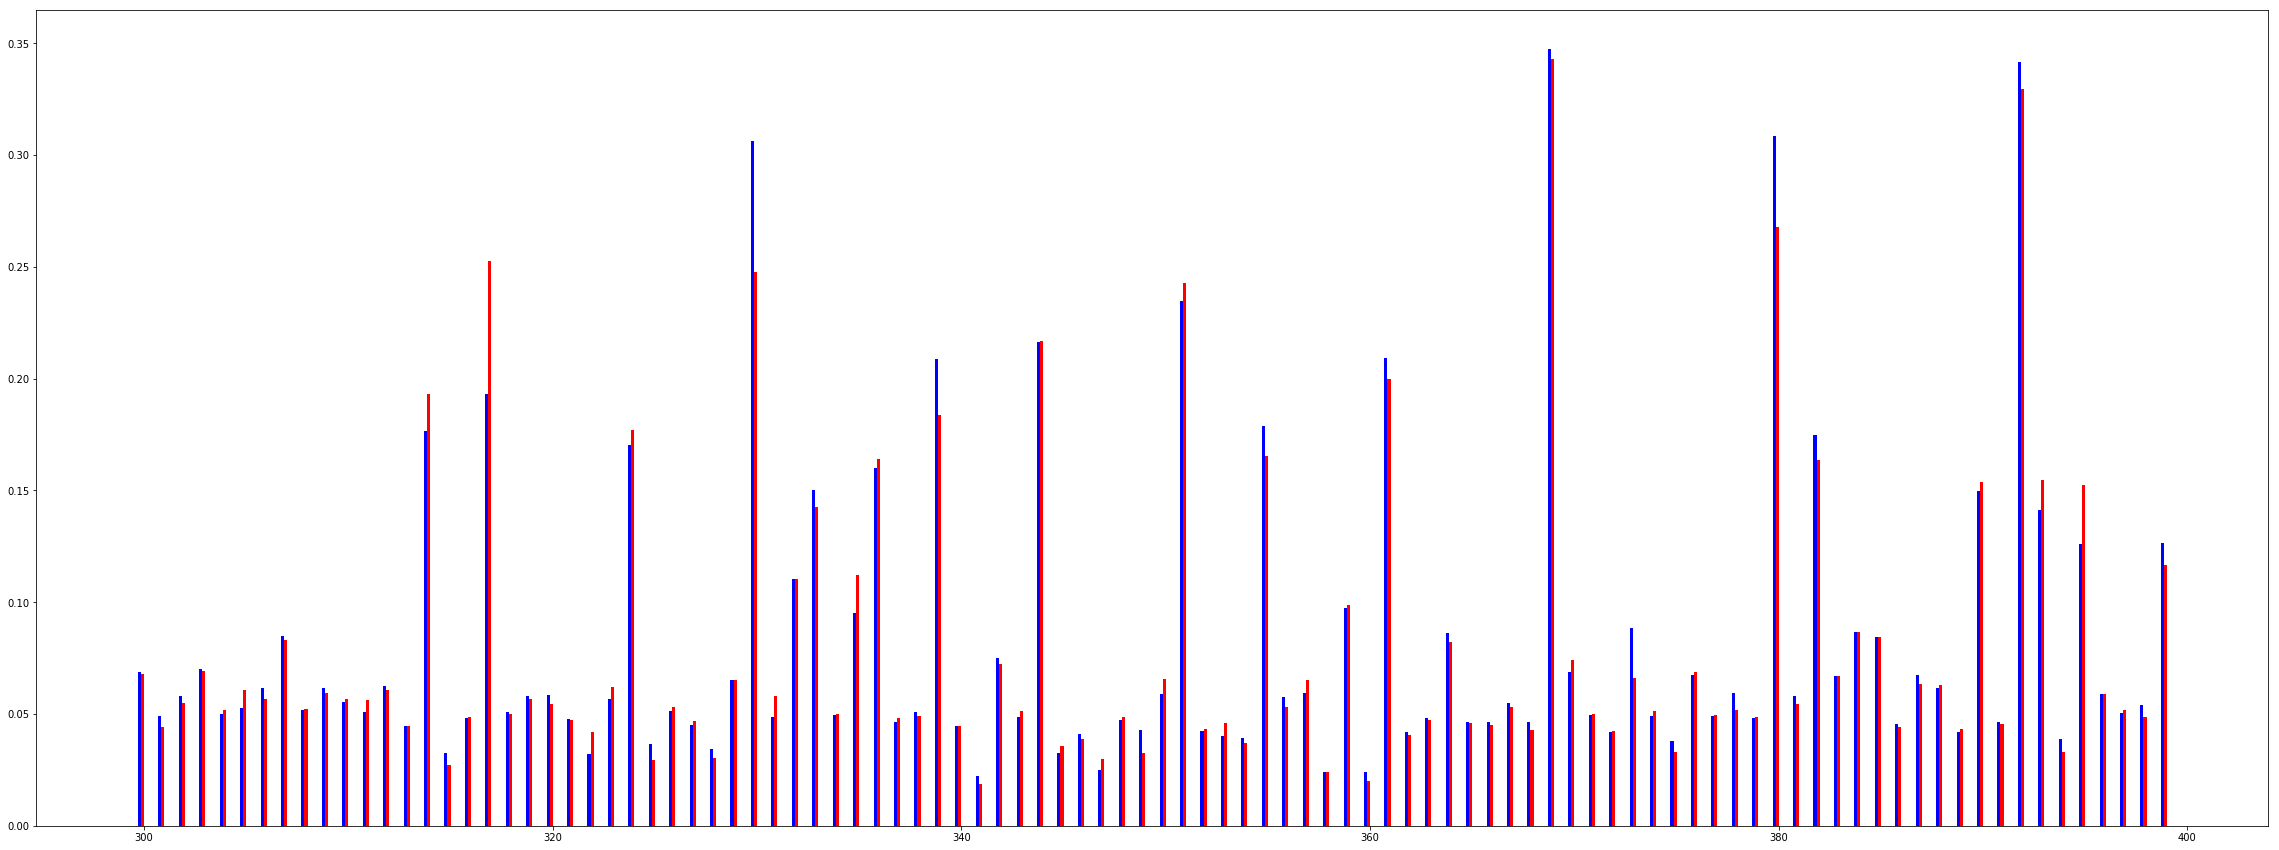

In [137]:
#visualisation error
graphe_error_visualization(Y_node_test_preprocessing,prediction_,300,400)

In [40]:
#analyze the error
#error_change(Y_node_test_preprocessing,prediction_,0.04)

In [182]:
def Feature_Engineering_version_4(data):
    """We use this function to do the preprocessing of the datas"""
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #test submission
    test_data=pd.read_csv("DATA/test.csv")
    train_data=pd.read_csv("DATA/train.csv")
    #--------------------------------------------------------------------------------------------------------------    
    #Add the columns training data of preprocessing in the data
    TEST_A_0=pd.get_dummies(train_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #Add the columns testing of preprocessing in the data
    TEST_A_0=pd.get_dummies(test_data.galaxy)
    TEST_A_COLUMNS_0=TEST_A_0.columns
    for INDEX in TEST_A_COLUMNS_0:
        data[INDEX]=TEST_A_0[INDEX]*0
    #--------------------------------------------------------------------------------------------------------------
    #we transforme the categorial variable galaxy in integer
    TEST_A=pd.get_dummies(data.galaxy)
    TEST_A_COLUMNS=TEST_A.columns
    for INDEX in TEST_A_COLUMNS:
        data[INDEX]=TEST_A[INDEX]
    #--------------------------------------------------------------------------------------------------------------
    data["Life expectancy at birth"]=data["Life expectancy at birth, male (galactic years)"]*data["Life expectancy at birth, female (galactic years)"]/2
    del data["existence expectancy at birth"]
    ###############################################################################################################
    ###############################################################################################################
    #--------------------------------------------------------------------------------------------------------------
    #data["existence expectancy"]=data["existence expectancy index"]*data["existence expectancy at birth"]
    #data["Intergalactic Development Index (IDI) Rank"]=data["Intergalactic Development Index (IDI), female, Rank"]*data["Intergalactic Development Index (IDI), male, Rank"]/2
    #data["Intergalactic Development Index (IDI)"]=data["Intergalactic Development Index (IDI), female"]*data["Intergalactic Development Index (IDI), male"]/2
    #data["Estimated gross galactic income per capita"]=data["Estimated gross galactic income per capita, male"]*data["Estimated gross galactic income per capita, female"]/2
    #data["Expected years of education"]=data["Expected years of education, female (galactic years)"]*data["Expected years of education, male (galactic years)"]/2
    #data["Mean years of education"]=data["Mean years of education, female (galactic years)"]*data["Mean years of education, male (galactic years)"]/2
    #data["Youth unemployment"]=data["Youth unemployment rate (female to male ratio)"]*data["Mortality rate, female grown up (per 1,000 people)"]
    #data["123 456 789"]=data["Population with at least some secondary education (% ages 25 and older)"]*data["Population, total (millions)"]
    #data["123 456 789"]=data["galactic year"]*data["Exports and imports (% of GGP)"]
    #data["random"]=data["Labour force participation rate (% ages 15 and older), female"]*data["Mortality rate, male grown up (per 1,000 people)"]/2
    #data["random1"]=data["Labour force participation rate (% ages 15 and older)"]*data["Mortality rate, female grown up (per 1,000 people)"]/2
    #data["random123456"]=np.exp(data["Labour force participation rate (% ages 15 and older), female"])
    #data["Labour force participatio"]=data["Labour force participation rate (% ages 15 and older)"]*data["Labour force participation rate (% ages 15 and older), female"]/2
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #data[""]=data[""]data[""]
    #del data["galactic year"]
    #del data["Mortality rate, female grown up (per 1,000 people)"]
    #del data["Mortality rate, male grown up (per 1,000 people)"]
    #we transform the galaxy in galaxy_encoding in this list
    #--------------------------------------------------------------------------------------------------------------
    ###############################################################################################################
    ###############################################################################################################
    #delete the catagoricial not necessary variable
    del data["galaxy"]
    del data["Current health expenditure (% of GGP)"]
    del data["Respiratory disease incidence (per 100,000 people)"]
    del data["Labour force participation rate (% ages 15 and older), female"]
    del data["Labour force participation rate (% ages 15 and older)"]
    #--------------------------------------------------------------------------------------------------------------
    column_uses_for_the_training[1]="galaxy_encoding"
    
    #Here we take care of the outlier
    
    #Here we replace all missing data by the median value or the next data
    data=data.fillna(data.mean())
    
    #transforme dataframe in array numpy
    Array_data=data.values
    
    return Array_data

In [224]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
###############################################################################################################
###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]
################################################################################################################
#--------------------------------------------------------------------------------------------------------------#
#preprocessing Data
#train_data_preprocessing=Feature_Engineering_version_1train_data)
#test_data_preprocessing=Feature_Engineering_version_1(test_data)
train_data_preprocessing=Feature_Engineering_version_2(train_data)
test_data_preprocessing=Feature_Engineering_version_2(test_data)
#train_data_preprocessing=Feature_Engineering_version_3(train_data)
#test_data_preprocessing=Feature_Engineering_version_3(test_data)
#train_data_preprocessing=Feature_Engineering_version_4(train_data)
#test_data_preprocessing=Feature_Engineering_version_4(test_data)
#--------------------------------------------------------------------------------------------------------------#
################################################################################################################
#build the model
bagging_regressor = GradientBoostingRegressor(n_estimators=10001, learning_rate= 0.09, max_depth=3,min_samples_split=2500, min_samples_leaf=1)

#fit the model
bagging_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)


prediction_test=bagging_regressor.predict(test_data_preprocessing)
test_data["y"]=prediction_test
################################################################################################################
#---------------------------------------------------------------------------------------------------------------
#op_pred=repartition_energy_strategy_1(test_data,10)
#op_pred=repartition_energy_strategy_2(test_data,11)
#op_pred=repartition_energy_strategy_3(test_data,11)
#op_pred=repartition_energy_strategy_4(test_data,10)
#op_pred=repartition_energy_strategy_5(test_data,10)
#op_pred=repartition_energy_strategy_6(test_data,10)
#op_pred=repartition_energy_strategy_7(test_data,10)
#op_pred=repartition_energy_strategy_9(test_data,10)
#op_pred=repartition_energy_strategy_10(test_data,10)
#op_pred=repartition_energy_strategy_11(test_data,10)
op_pred=repartition_energy_strategy_12(test_data)
#---------------------------------------------------------------------------------------------------------------
################################################################################################################
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([np.abs(prediction_test[i]),np.abs(op_pred[i])])

#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("----------------------------------------------------------------------------------------------------------")
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
#save_liste(prediction_liste,"prediction_")
save_liste(prediction_liste,"_")

/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value i

percentage_sup_0_7== 0.86188
percentage_inf_0_7== 0.11162
Total energy== 48675.0
----------------------------------------------------------------------------------------------------------
POTENTIAL FOR INCREASE ON THE INDEX  =  5039.245587343709
LIKELY INCREASE IN THE INDEX         =  1814.7064077556097
TOTAL INDEX                          =  69.95142463292605


In [291]:
op_pred=repartition_energy_strategy_12(test_data)
#---------------------------------------------------------------------------------------------------------------
################################################################################################################
#prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([np.abs(prediction_test[i]),np.abs(op_pred[i])])

#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("----------------------------------------------------------------------------------------------------------")
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
#save_liste(prediction_liste,"prediction_")
#save_liste(prediction_liste,"_")

     fun: -1826.5806771838702
     jac: array([-0.03683472, -0.03768921, -0.03741455, -0.03668213, -0.0406189 ,
       -0.03839111, -0.03927612, -0.03726196, -0.03683472, -0.03656006,
       -0.03768921, -0.04040527, -0.037323  , -0.03704834, -0.03988647,
       -0.03613281, -0.04510498, -0.03872681, -0.03753662, -0.03704834,
       -0.03747559, -0.04214478, -0.03823853, -0.04330444, -0.03649902,
       -0.04217529, -0.03890991, -0.03738403, -0.03665161, -0.03741455,
       -0.03713989, -0.03723145, -0.03671265, -0.03411865, -0.04449463,
       -0.03726196, -0.03713989, -0.03674316, -0.04190063, -0.03665161,
       -0.03704834, -0.04348755, -0.03622437, -0.03689575, -0.03396606,
       -0.03903198, -0.03701782, -0.03848267, -0.0368042 , -0.04071045,
       -0.03704834, -0.03631592, -0.04043579, -0.03726196, -0.04098511,
       -0.03601074, -0.04299927, -0.04214478, -0.03768921, -0.03649902,
       -0.03762817, -0.03591919, -0.03771973, -0.03640747, -0.03955078,
       -0.0378418 , -0.0

KeyError: 0

In [92]:
#prediction courbe
#prediction_graph(prediction_test,300)

In [287]:
def Likely_increase_in_the_Index(E):
    """this function  take energy and return the likely increase"""
    prediction_repartition=np.abs(prediction_test)
    tampon=E*((3-np.log(prediction_repartition+0.01))*(3-np.log(prediction_repartition+0.01)))/1000
    
    return -np.sum(tampon) 

In [ ]:
def repartition_energy_strategy_12(data_energy):
    """this functiuon use scipy optimization of python for calculate best allocation energy"""
    
    #Here we replace all missing data by the median value or the next data
    data_energy=data_energy.fillna(data_energy.mean())

    
    #percentage value
    percentage_inf_0_7=0.0
    percentage_sup_0_7=0.0
    
    #The repartition value
    #prediction_repartition=np.abs(data_energy["y"].values.tolist())
    
    #initialization of energy
    #mask is list that value is 1 if it is data_energy["existence expectancy index"].iloc[i]<0.7, 0 other
    mask_0_7=[]
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"].iloc[i]<0.7):
            mask_0_7.append(1)
        else:
            mask_0_7.append(0)
            
    #Likely increase contrain
    cons=({'type': 'ineq',
          'fun': lambda E: 50000-np.sum(E)},
         {'type': 'ineq',
          'fun': lambda E: np.sum(E*mask_0_7)-500},
         {'type': 'ineq',
          'fun': lambda E: E},
         {'type': 'ineq',
          'fun': lambda E: 100-E})    
#-------------------------------------------------------------------------------------------------------
    #Allocation energy at the begining
    E=data_energy["existence expectancy index"]*0+1
#-------------------------------------------------------------------------------------------------------
    #calculate the best allocation energy
    Energy = minimize(Likely_increase_in_the_Index, E, constraints=cons)
    
    #calculate the percentage of the energy we have allocated
    for i in range(data_energy.shape[0]):
        if(data_energy["existence expectancy index"].iloc[i]<0.7):
            percentage_inf_0_7+=Energy.x[i]
        else:
            percentage_sup_0_7+=Energy.x[i]
                
       
    print("percentage_sup_0_7==",percentage_sup_0_7/50000)
    print("percentage_inf_0_7==",percentage_inf_0_7/50000)
    print("Total energy==",Energy.sum())
    
    return Energy.x

In [ ]:
MIN ERROR RMSE== 0.01989708933947141     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001->median : 
MIN ERROR RMSE== 0.01723624213581525     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001
MIN ERROR RMSE== 0.01657887536976412     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001
MIN ERROR RMSE== 0.01610883821330026     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001
MIN ERROR RMSE== 0.01585686397528856     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001->delete existence expectancy at birth : 

In [ ]:
MIN ERROR RMSE== 0.020920659887323532     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001
MIN ERROR RMSE== 0.020967149332005625     OBTAIN WITH learning_rate== 0.02      and n_estimators== 500001
MIN ERROR RMSE== 0.020858002041096474     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001 
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1
MIN ERROR RMSE== 0.02079566695403087     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1
MIN ERROR RMSE== 0.020557447070987417     OBTAIN WITH learning_rate== 0.09      and n_estimators== 100001
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1
MIN ERROR RMSE== 0.020528025813641004     OBTAIN WITH learning_rate== 0.02      and n_estimators== 100001
        MAX_DEPTH=3 MIN_SAMPLES_SPLIT=3 MIN_SAMPLES_LEAF=1


In [ ]:
#op_pred=repartition_energy_strategy_5(test_data,10)
percentage_sup_0_7== 0.86788
percentage_inf_0_7== 0.132
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.288931566672
LIKELY INCREASE IN THE INDEX         =  1845.3137889820994
TOTAL INDEX                          =  72.84831390636701
#op_pred=repartition_energy_strategy_6(test_data,10)
percentage_sup_0_7== 0.89988
percentage_inf_0_7== 0.1
POTENTIAL FOR INCREASE ON THE INDEX  =  5003.845370998089
LIKELY INCREASE IN THE INDEX         =  1850.1326338520128
TOTAL INDEX                          =  73.15030614138203
#op_pred=repartition_energy_strategy_6(test_data,10)==10001
percentage_sup_0_7== 0.89988
percentage_inf_0_7== 0.1
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.822920834223
LIKELY INCREASE IN THE INDEX         =  1848.0800644412034
TOTAL INDEX                          =  73.14867232815361
#op_pred=repartition_energy_strategy_5(test_data,10)=10001
percentage_sup_0_7== 0.86788
percentage_inf_0_7== 0.132
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.548136507249
LIKELY INCREASE IN THE INDEX         =  1847.8340468262816
TOTAL INDEX                          =  73.1447088933696
#op_pred=repartition_energy_strategy_4(test_data,10)=10001
percentage_sup_0_7== 0.8890399999999755
percentage_inf_0_7== 0.102
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.44429713667
LIKELY INCREASE IN THE INDEX         =  1829.1378070213807
TOTAL INDEX                          =  73.21192033270165
#op_pred=repartition_energy_strategy_3(test_data,11)=10001
percentage_sup_0_7== 0.889821999999999
percentage_inf_0_7== 0.10997799999999998
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.940033743109
LIKELY INCREASE IN THE INDEX         =  1671.7373396603184
TOTAL INDEX                          =  73.15123132939549
#op_pred=repartition_energy_strategy_2(test_data,11)=10001
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.0952960183995
LIKELY INCREASE IN THE INDEX         =  1648.1500470471433
TOTAL INDEX                          =  73.26254196177963
#op_pred=repartition_energy_strategy_1(test_data,11)=10001
POTENTIAL FOR INCREASE ON THE INDEX  =  5002.342979700957
LIKELY INCREASE IN THE INDEX         =  1627.1542064459184
TOTAL INDEX                          =  73.19998087350122
#op_pred=repartition_energy_strategy_8(test_data,11)=10001
percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5001.295519990818
LIKELY INCREASE IN THE INDEX         =  1850.8819608038777
TOTAL INDEX                          =  73.00876638217554
#op_pred=repartition_energy_strategy_8(test_data,11)=10001
percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5019.839939052477
LIKELY INCREASE IN THE INDEX         =  1853.7819768026716
TOTAL INDEX                          =  71.26682961595846
#op_pred=repartition_energy_strategy_8(test_data,11)=10001
percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5023.980554036348
LIKELY INCREASE IN THE INDEX         =  1861.5233870477325
TOTAL INDEX                          =  71.46667469924262

#-------------------------------------------------------------------------------------------------------------#

 ## IN HERE WE TRY TO BUILD THE GRAPHE OF LIKELY INCREASE IN FACT PARAMETOR OF MODEL USING GRADIENT BOOSTING 

In [98]:
#load data 
train_data=pd.read_csv("DATA/train.csv")
test_data=pd.read_csv("DATA/test.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]
###############################################################################################################
#--------------------------------------------------------------------------------------------------------------
#Add the columns of preprocessing in the testing data
#TEST_A_0=pd.get_dummies(train_data.galaxy)
#TEST_A_COLUMNS_0=TEST_A_0.columns
#for INDEX in TEST_A_COLUMNS_0:
#    test_data[INDEX]=TEST_A_0[INDEX]*0
    
#TEST_B_0=pd.get_dummies(train_data["galactic year"])
#TEST_B_COLUMNS_0=TEST_B_0.columns
#for INDEX_1 in TEST_B_COLUMNS_0:
#    test_data[INDEX_1]=TEST_B_0[INDEX_1]*0
##############################################################################################################
#Add the columns of preprocessing in the training data
#TEST_A_0=pd.get_dummies(test_data.galaxy)
#TEST_A_COLUMNS_0=TEST_A_0.columns
#for INDEX in TEST_A_COLUMNS_0:
#    train_data[INDEX]=TEST_A_0[INDEX]*0
    
#TEST_B_0=pd.get_dummies(test_data["galactic year"])
#TEST_B_COLUMNS_0=TEST_B_0.columns
#for INDEX_1 in TEST_B_COLUMNS_0:
#    train_data[INDEX_1]=TEST_B_0[INDEX_1]*0
#---------------------------------------------------------------------------------------------------------------
#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_2(train_data)
test_data_preprocessing=Feature_Engineering_version_2(test_data)
################################################################################################################

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
likely_increase_BaggingRegressor=[]
parameter_BaggingRegressor=[]
potential_increase_BaggingRegressor=[]
total_index_BaggingRegressor=[]

start_time = timer(None)
for i in [1,100,200,300,400,500,600,700,800,900,1000,2000]:
    parameter_BaggingRegressor.append(i+1)
    bagging_regressor = GradientBoostingRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the bagging model
    bagging_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)

    #compute the test
    prediction_test=bagging_regressor.predict(test_data_preprocessing)
    test_data["y"]=prediction_test    
    op_pred=repartition_energy_strategy_8(test_data,10)
    prediction_liste=[]
    for i in range(prediction_test.shape[0]):
        prediction_liste.append([prediction_test[i],op_pred[i]])
    
    #statistique predictor
    Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
    likely_increase_BaggingRegressor.append(Likely_increase_in_the_Index)
    potential_increase_BaggingRegressor.append(Potential_for_increase_in_the_Index)
    total_index_BaggingRegressor.append(total_index)
    
    print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
    print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
    print("TOTAL INDEX                          = ",total_index)
timer(start_time)

/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  4791.107294397383
LIKELY INCREASE IN THE INDEX         =  1481.5331514719387
TOTAL INDEX                          =  73.5710195281129


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  4958.079242586148
LIKELY INCREASE IN THE INDEX         =  1798.0748795371505
TOTAL INDEX                          =  74.30858689736287


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  4987.548874613591
LIKELY INCREASE IN THE INDEX         =  1826.2617163581829
TOTAL INDEX                          =  72.84447960783076


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5000.7967292813055
LIKELY INCREASE IN THE INDEX         =  1838.1152371163605
TOTAL INDEX                          =  72.18850952584411


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5008.328265479813
LIKELY INCREASE IN THE INDEX         =  1846.456730997967
TOTAL INDEX                          =  71.89764026759207


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5013.28639922767
LIKELY INCREASE IN THE INDEX         =  1850.6402718911702
TOTAL INDEX                          =  71.65728123167393


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5016.411350333299
LIKELY INCREASE IN THE INDEX         =  1854.1013420389922
TOTAL INDEX                          =  71.57294026324902


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5018.461807121872
LIKELY INCREASE IN THE INDEX         =  1854.5294881254135
TOTAL INDEX                          =  71.33539253707544


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5018.692487116441
LIKELY INCREASE IN THE INDEX         =  1855.333664939404
TOTAL INDEX                          =  71.4120839380191


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5019.998689656567
LIKELY INCREASE IN THE INDEX         =  1855.5688614972591
TOTAL INDEX                          =  71.26714675951276


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5020.57846540294
LIKELY INCREASE IN THE INDEX         =  1855.7151066503966
TOTAL INDEX                          =  71.24336800111531


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.9
percentage_inf_0_7== 0.1
Total energy== 50000.0
POTENTIAL FOR INCREASE ON THE INDEX  =  5022.5405054442745
LIKELY INCREASE IN THE INDEX         =  1857.760312091112
TOTAL INDEX                          =  71.27612171382995

Time taken: 0 hours 10 minutes and 38.85 seconds.


In [99]:
#------------------------------------------------1004------------------------------------------------#
#POTENTIAL FOR INCREASE ON THE INDEX  =  5002.642952810951
#LIKELY INCREASE IN THE INDEX         =  1845.1052855502858
#TOTAL INDEX                          =  72.79181160076018
#----------------------------------------------------------------------------------------------------#

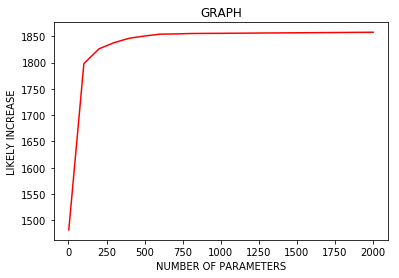

In [100]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(likely_increase_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('LIKELY INCREASE')
plt.title('GRAPH')
plt.show()

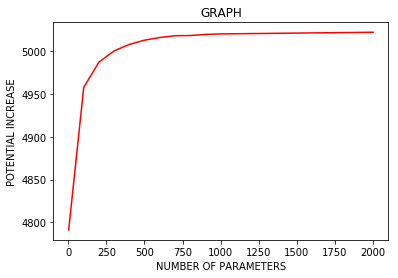

In [101]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(potential_increase_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('POTENTIAL INCREASE')
plt.title('GRAPH')
plt.show()

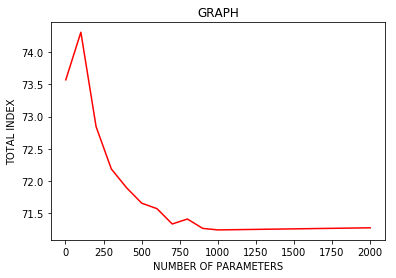

In [102]:
#BUILD THE GRAPH
X=np.array(parameter_BaggingRegressor)
Y=np.array(total_index_BaggingRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('TOTAL INDEX')
plt.title('GRAPH')
plt.show()

## CONCLUSION : ????

# <center >CatBoost REGRESSOR </center> #

In [66]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.25, random_state=10)


#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
from catboost import CatBoostRegressor
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_catBoostRegressor=[]
parameter_catBoostRegressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_catBoostRegressor.append(i+1)
    #model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)
    catBoost_regressor=CatBoostRegressor(iterations=10000, depth=3, learning_rate=0.1, loss_function='RMSE')
    #training the bagging model
    catBoost_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)

    #predictor and calcul rms
    prediction_=catBoost_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_catBoostRegressor.append(rmse)
timer(start_time)

0:	learn: 0.0966593	total: 11.9ms	remaining: 1m 59s
1:	learn: 0.0894377	total: 18.1ms	remaining: 1m 30s
2:	learn: 0.0824178	total: 24ms	remaining: 1m 20s
3:	learn: 0.0763023	total: 31ms	remaining: 1m 17s
4:	learn: 0.0708378	total: 37.8ms	remaining: 1m 15s
5:	learn: 0.0661395	total: 44.2ms	remaining: 1m 13s
6:	learn: 0.0618976	total: 50.4ms	remaining: 1m 11s
7:	learn: 0.0580329	total: 56.4ms	remaining: 1m 10s
8:	learn: 0.0549207	total: 63.8ms	remaining: 1m 10s
9:	learn: 0.0520662	total: 69.9ms	remaining: 1m 9s
10:	learn: 0.0496026	total: 76.7ms	remaining: 1m 9s
11:	learn: 0.0473116	total: 83.5ms	remaining: 1m 9s
12:	learn: 0.0452733	total: 89.6ms	remaining: 1m 8s
13:	learn: 0.0434553	total: 96.9ms	remaining: 1m 9s
14:	learn: 0.0417689	total: 103ms	remaining: 1m 8s
15:	learn: 0.0403136	total: 110ms	remaining: 1m 8s
16:	learn: 0.0389000	total: 116ms	remaining: 1m 8s
17:	learn: 0.0376009	total: 122ms	remaining: 1m 7s
18:	learn: 0.0364399	total: 128ms	remaining: 1m 7s
19:	learn: 0.0355125	t

183:	learn: 0.0176869	total: 1.21s	remaining: 1m 4s
184:	learn: 0.0176850	total: 1.22s	remaining: 1m 4s
185:	learn: 0.0176743	total: 1.22s	remaining: 1m 4s
186:	learn: 0.0176669	total: 1.23s	remaining: 1m 4s
187:	learn: 0.0176624	total: 1.24s	remaining: 1m 4s
188:	learn: 0.0176589	total: 1.25s	remaining: 1m 4s
189:	learn: 0.0176530	total: 1.25s	remaining: 1m 4s
190:	learn: 0.0176369	total: 1.26s	remaining: 1m 4s
191:	learn: 0.0176321	total: 1.26s	remaining: 1m 4s
192:	learn: 0.0176317	total: 1.27s	remaining: 1m 4s
193:	learn: 0.0176285	total: 1.28s	remaining: 1m 4s
194:	learn: 0.0175953	total: 1.28s	remaining: 1m 4s
195:	learn: 0.0175909	total: 1.29s	remaining: 1m 4s
196:	learn: 0.0175830	total: 1.29s	remaining: 1m 4s
197:	learn: 0.0175413	total: 1.3s	remaining: 1m 4s
198:	learn: 0.0175332	total: 1.31s	remaining: 1m 4s
199:	learn: 0.0175304	total: 1.31s	remaining: 1m 4s
200:	learn: 0.0175111	total: 1.32s	remaining: 1m 4s
201:	learn: 0.0174513	total: 1.33s	remaining: 1m 4s
202:	learn: 0

343:	learn: 0.0155312	total: 2.19s	remaining: 1m 1s
344:	learn: 0.0155305	total: 2.2s	remaining: 1m 1s
345:	learn: 0.0155026	total: 2.21s	remaining: 1m 1s
346:	learn: 0.0155010	total: 2.22s	remaining: 1m 1s
347:	learn: 0.0154922	total: 2.22s	remaining: 1m 1s
348:	learn: 0.0154917	total: 2.23s	remaining: 1m 1s
349:	learn: 0.0154492	total: 2.23s	remaining: 1m 1s
350:	learn: 0.0154201	total: 2.24s	remaining: 1m 1s
351:	learn: 0.0154190	total: 2.25s	remaining: 1m 1s
352:	learn: 0.0153994	total: 2.25s	remaining: 1m 1s
353:	learn: 0.0153994	total: 2.26s	remaining: 1m 1s
354:	learn: 0.0153989	total: 2.27s	remaining: 1m 1s
355:	learn: 0.0153984	total: 2.27s	remaining: 1m 1s
356:	learn: 0.0153924	total: 2.28s	remaining: 1m 1s
357:	learn: 0.0153923	total: 2.28s	remaining: 1m 1s
358:	learn: 0.0153831	total: 2.29s	remaining: 1m 1s
359:	learn: 0.0153819	total: 2.29s	remaining: 1m 1s
360:	learn: 0.0153783	total: 2.3s	remaining: 1m 1s
361:	learn: 0.0153707	total: 2.31s	remaining: 1m 1s
362:	learn: 0.

537:	learn: 0.0139149	total: 3.37s	remaining: 59.3s
538:	learn: 0.0139109	total: 3.38s	remaining: 59.3s
539:	learn: 0.0139063	total: 3.38s	remaining: 59.3s
540:	learn: 0.0138922	total: 3.39s	remaining: 59.3s
541:	learn: 0.0138859	total: 3.4s	remaining: 59.3s
542:	learn: 0.0138844	total: 3.4s	remaining: 59.3s
543:	learn: 0.0138835	total: 3.41s	remaining: 59.3s
544:	learn: 0.0138833	total: 3.42s	remaining: 59.3s
545:	learn: 0.0138832	total: 3.42s	remaining: 59.3s
546:	learn: 0.0138822	total: 3.43s	remaining: 59.2s
547:	learn: 0.0138728	total: 3.43s	remaining: 59.2s
548:	learn: 0.0138546	total: 3.44s	remaining: 59.2s
549:	learn: 0.0138531	total: 3.44s	remaining: 59.2s
550:	learn: 0.0138382	total: 3.45s	remaining: 59.2s
551:	learn: 0.0138380	total: 3.46s	remaining: 59.2s
552:	learn: 0.0138356	total: 3.46s	remaining: 59.2s
553:	learn: 0.0138351	total: 3.47s	remaining: 59.2s
554:	learn: 0.0138321	total: 3.48s	remaining: 59.1s
555:	learn: 0.0138303	total: 3.48s	remaining: 59.1s
556:	learn: 0.

725:	learn: 0.0130245	total: 4.53s	remaining: 57.9s
726:	learn: 0.0130238	total: 4.54s	remaining: 57.9s
727:	learn: 0.0130236	total: 4.55s	remaining: 58s
728:	learn: 0.0130216	total: 4.56s	remaining: 58s
729:	learn: 0.0130210	total: 4.56s	remaining: 58s
730:	learn: 0.0130209	total: 4.57s	remaining: 58s
731:	learn: 0.0129947	total: 4.58s	remaining: 58s
732:	learn: 0.0129946	total: 4.59s	remaining: 58s
733:	learn: 0.0129937	total: 4.59s	remaining: 58s
734:	learn: 0.0129923	total: 4.6s	remaining: 58s
735:	learn: 0.0129915	total: 4.61s	remaining: 58s
736:	learn: 0.0129912	total: 4.62s	remaining: 58s
737:	learn: 0.0129906	total: 4.62s	remaining: 58s
738:	learn: 0.0129902	total: 4.63s	remaining: 58s
739:	learn: 0.0129889	total: 4.63s	remaining: 58s
740:	learn: 0.0129745	total: 4.64s	remaining: 58s
741:	learn: 0.0129602	total: 4.65s	remaining: 58s
742:	learn: 0.0129289	total: 4.66s	remaining: 58s
743:	learn: 0.0129273	total: 4.66s	remaining: 58s
744:	learn: 0.0129273	total: 4.67s	remaining: 5

894:	learn: 0.0125202	total: 5.71s	remaining: 58.1s
895:	learn: 0.0125197	total: 5.72s	remaining: 58.1s
896:	learn: 0.0125148	total: 5.72s	remaining: 58.1s
897:	learn: 0.0125072	total: 5.73s	remaining: 58.1s
898:	learn: 0.0125006	total: 5.74s	remaining: 58.1s
899:	learn: 0.0124804	total: 5.74s	remaining: 58.1s
900:	learn: 0.0124633	total: 5.75s	remaining: 58.1s
901:	learn: 0.0124632	total: 5.75s	remaining: 58s
902:	learn: 0.0124632	total: 5.76s	remaining: 58s
903:	learn: 0.0124630	total: 5.77s	remaining: 58s
904:	learn: 0.0124626	total: 5.77s	remaining: 58s
905:	learn: 0.0124612	total: 5.78s	remaining: 58s
906:	learn: 0.0124590	total: 5.79s	remaining: 58s
907:	learn: 0.0124474	total: 5.79s	remaining: 58s
908:	learn: 0.0124350	total: 5.8s	remaining: 58s
909:	learn: 0.0124290	total: 5.81s	remaining: 58s
910:	learn: 0.0124284	total: 5.81s	remaining: 58s
911:	learn: 0.0124061	total: 5.82s	remaining: 58s
912:	learn: 0.0124054	total: 5.83s	remaining: 58s
913:	learn: 0.0124053	total: 5.83s	re

1069:	learn: 0.0119162	total: 6.86s	remaining: 57.3s
1070:	learn: 0.0119154	total: 6.87s	remaining: 57.3s
1071:	learn: 0.0119152	total: 6.88s	remaining: 57.3s
1072:	learn: 0.0119149	total: 6.89s	remaining: 57.3s
1073:	learn: 0.0119126	total: 6.9s	remaining: 57.3s
1074:	learn: 0.0119121	total: 6.9s	remaining: 57.3s
1075:	learn: 0.0119119	total: 6.92s	remaining: 57.4s
1076:	learn: 0.0119117	total: 6.93s	remaining: 57.4s
1077:	learn: 0.0119110	total: 6.94s	remaining: 57.4s
1078:	learn: 0.0119101	total: 6.95s	remaining: 57.5s
1079:	learn: 0.0119053	total: 6.96s	remaining: 57.5s
1080:	learn: 0.0118955	total: 6.96s	remaining: 57.5s
1081:	learn: 0.0118929	total: 6.98s	remaining: 57.5s
1082:	learn: 0.0118926	total: 6.99s	remaining: 57.5s
1083:	learn: 0.0118921	total: 7s	remaining: 57.5s
1084:	learn: 0.0118918	total: 7s	remaining: 57.6s
1085:	learn: 0.0118905	total: 7.01s	remaining: 57.6s
1086:	learn: 0.0118896	total: 7.02s	remaining: 57.6s
1087:	learn: 0.0118894	total: 7.03s	remaining: 57.6s
1

1234:	learn: 0.0115763	total: 8.02s	remaining: 56.9s
1235:	learn: 0.0115753	total: 8.03s	remaining: 56.9s
1236:	learn: 0.0115751	total: 8.04s	remaining: 56.9s
1237:	learn: 0.0115751	total: 8.04s	remaining: 56.9s
1238:	learn: 0.0115750	total: 8.05s	remaining: 56.9s
1239:	learn: 0.0115748	total: 8.06s	remaining: 56.9s
1240:	learn: 0.0115747	total: 8.07s	remaining: 56.9s
1241:	learn: 0.0115747	total: 8.07s	remaining: 56.9s
1242:	learn: 0.0115743	total: 8.08s	remaining: 56.9s
1243:	learn: 0.0115742	total: 8.09s	remaining: 56.9s
1244:	learn: 0.0115741	total: 8.1s	remaining: 56.9s
1245:	learn: 0.0115741	total: 8.1s	remaining: 56.9s
1246:	learn: 0.0115737	total: 8.11s	remaining: 56.9s
1247:	learn: 0.0115734	total: 8.12s	remaining: 56.9s
1248:	learn: 0.0115715	total: 8.12s	remaining: 56.9s
1249:	learn: 0.0115714	total: 8.13s	remaining: 56.9s
1250:	learn: 0.0115713	total: 8.14s	remaining: 56.9s
1251:	learn: 0.0115632	total: 8.14s	remaining: 56.9s
1252:	learn: 0.0115631	total: 8.15s	remaining: 5

1401:	learn: 0.0113521	total: 9.17s	remaining: 56.2s
1402:	learn: 0.0113521	total: 9.18s	remaining: 56.2s
1403:	learn: 0.0113519	total: 9.19s	remaining: 56.2s
1404:	learn: 0.0113515	total: 9.19s	remaining: 56.2s
1405:	learn: 0.0113512	total: 9.2s	remaining: 56.2s
1406:	learn: 0.0113511	total: 9.2s	remaining: 56.2s
1407:	learn: 0.0113511	total: 9.21s	remaining: 56.2s
1408:	learn: 0.0113316	total: 9.21s	remaining: 56.2s
1409:	learn: 0.0113313	total: 9.22s	remaining: 56.2s
1410:	learn: 0.0113312	total: 9.23s	remaining: 56.2s
1411:	learn: 0.0113311	total: 9.24s	remaining: 56.2s
1412:	learn: 0.0113310	total: 9.24s	remaining: 56.2s
1413:	learn: 0.0113309	total: 9.25s	remaining: 56.2s
1414:	learn: 0.0113306	total: 9.26s	remaining: 56.2s
1415:	learn: 0.0113306	total: 9.26s	remaining: 56.1s
1416:	learn: 0.0113305	total: 9.27s	remaining: 56.1s
1417:	learn: 0.0113222	total: 9.27s	remaining: 56.1s
1418:	learn: 0.0113219	total: 9.28s	remaining: 56.1s
1419:	learn: 0.0113218	total: 9.29s	remaining: 5

1570:	learn: 0.0110270	total: 10.3s	remaining: 55.4s
1571:	learn: 0.0110199	total: 10.3s	remaining: 55.4s
1572:	learn: 0.0110199	total: 10.3s	remaining: 55.4s
1573:	learn: 0.0110198	total: 10.3s	remaining: 55.4s
1574:	learn: 0.0110197	total: 10.4s	remaining: 55.4s
1575:	learn: 0.0110195	total: 10.4s	remaining: 55.4s
1576:	learn: 0.0110195	total: 10.4s	remaining: 55.4s
1577:	learn: 0.0110194	total: 10.4s	remaining: 55.4s
1578:	learn: 0.0110148	total: 10.4s	remaining: 55.4s
1579:	learn: 0.0110137	total: 10.4s	remaining: 55.4s
1580:	learn: 0.0110129	total: 10.4s	remaining: 55.3s
1581:	learn: 0.0110129	total: 10.4s	remaining: 55.3s
1582:	learn: 0.0110119	total: 10.4s	remaining: 55.3s
1583:	learn: 0.0110119	total: 10.4s	remaining: 55.3s
1584:	learn: 0.0110112	total: 10.4s	remaining: 55.3s
1585:	learn: 0.0110112	total: 10.4s	remaining: 55.3s
1586:	learn: 0.0110108	total: 10.4s	remaining: 55.3s
1587:	learn: 0.0110107	total: 10.4s	remaining: 55.3s
1588:	learn: 0.0110107	total: 10.4s	remaining:

1744:	learn: 0.0108066	total: 11.5s	remaining: 54.2s
1745:	learn: 0.0108064	total: 11.5s	remaining: 54.2s
1746:	learn: 0.0108064	total: 11.5s	remaining: 54.2s
1747:	learn: 0.0107920	total: 11.5s	remaining: 54.2s
1748:	learn: 0.0107897	total: 11.5s	remaining: 54.2s
1749:	learn: 0.0107860	total: 11.5s	remaining: 54.2s
1750:	learn: 0.0107860	total: 11.5s	remaining: 54.2s
1751:	learn: 0.0107843	total: 11.5s	remaining: 54.2s
1752:	learn: 0.0107834	total: 11.5s	remaining: 54.1s
1753:	learn: 0.0107833	total: 11.5s	remaining: 54.1s
1754:	learn: 0.0107833	total: 11.5s	remaining: 54.1s
1755:	learn: 0.0107830	total: 11.5s	remaining: 54.1s
1756:	learn: 0.0107815	total: 11.5s	remaining: 54.1s
1757:	learn: 0.0107815	total: 11.5s	remaining: 54.1s
1758:	learn: 0.0107814	total: 11.5s	remaining: 54.1s
1759:	learn: 0.0107769	total: 11.6s	remaining: 54.1s
1760:	learn: 0.0107768	total: 11.6s	remaining: 54.1s
1761:	learn: 0.0107767	total: 11.6s	remaining: 54.1s
1762:	learn: 0.0107765	total: 11.6s	remaining:

1915:	learn: 0.0106103	total: 12.6s	remaining: 53s
1916:	learn: 0.0106103	total: 12.6s	remaining: 53s
1917:	learn: 0.0106103	total: 12.6s	remaining: 53s
1918:	learn: 0.0106102	total: 12.6s	remaining: 53s
1919:	learn: 0.0106102	total: 12.6s	remaining: 53s
1920:	learn: 0.0106101	total: 12.6s	remaining: 53s
1921:	learn: 0.0106101	total: 12.6s	remaining: 53s
1922:	learn: 0.0106090	total: 12.6s	remaining: 53s
1923:	learn: 0.0106090	total: 12.6s	remaining: 53s
1924:	learn: 0.0106088	total: 12.6s	remaining: 53s
1925:	learn: 0.0106086	total: 12.6s	remaining: 53s
1926:	learn: 0.0105925	total: 12.6s	remaining: 53s
1927:	learn: 0.0105925	total: 12.6s	remaining: 52.9s
1928:	learn: 0.0105925	total: 12.7s	remaining: 52.9s
1929:	learn: 0.0105925	total: 12.7s	remaining: 52.9s
1930:	learn: 0.0105925	total: 12.7s	remaining: 52.9s
1931:	learn: 0.0105920	total: 12.7s	remaining: 52.9s
1932:	learn: 0.0105920	total: 12.7s	remaining: 52.9s
1933:	learn: 0.0105910	total: 12.7s	remaining: 52.9s
1934:	learn: 0.01

2093:	learn: 0.0104165	total: 13.7s	remaining: 51.7s
2094:	learn: 0.0104164	total: 13.7s	remaining: 51.7s
2095:	learn: 0.0104091	total: 13.7s	remaining: 51.7s
2096:	learn: 0.0104080	total: 13.7s	remaining: 51.7s
2097:	learn: 0.0104080	total: 13.7s	remaining: 51.7s
2098:	learn: 0.0104044	total: 13.7s	remaining: 51.6s
2099:	learn: 0.0104042	total: 13.7s	remaining: 51.6s
2100:	learn: 0.0104025	total: 13.7s	remaining: 51.6s
2101:	learn: 0.0104023	total: 13.7s	remaining: 51.6s
2102:	learn: 0.0103905	total: 13.7s	remaining: 51.6s
2103:	learn: 0.0103867	total: 13.8s	remaining: 51.6s
2104:	learn: 0.0103866	total: 13.8s	remaining: 51.6s
2105:	learn: 0.0103853	total: 13.8s	remaining: 51.6s
2106:	learn: 0.0103756	total: 13.8s	remaining: 51.6s
2107:	learn: 0.0103727	total: 13.8s	remaining: 51.6s
2108:	learn: 0.0103726	total: 13.8s	remaining: 51.6s
2109:	learn: 0.0103726	total: 13.8s	remaining: 51.6s
2110:	learn: 0.0103725	total: 13.8s	remaining: 51.6s
2111:	learn: 0.0103724	total: 13.8s	remaining:

2260:	learn: 0.0102384	total: 14.8s	remaining: 50.7s
2261:	learn: 0.0102384	total: 14.8s	remaining: 50.7s
2262:	learn: 0.0102382	total: 14.8s	remaining: 50.7s
2263:	learn: 0.0102382	total: 14.8s	remaining: 50.7s
2264:	learn: 0.0102382	total: 14.8s	remaining: 50.7s
2265:	learn: 0.0102380	total: 14.8s	remaining: 50.7s
2266:	learn: 0.0102380	total: 14.8s	remaining: 50.6s
2267:	learn: 0.0102379	total: 14.9s	remaining: 50.6s
2268:	learn: 0.0102379	total: 14.9s	remaining: 50.6s
2269:	learn: 0.0102379	total: 14.9s	remaining: 50.6s
2270:	learn: 0.0102379	total: 14.9s	remaining: 50.6s
2271:	learn: 0.0102376	total: 14.9s	remaining: 50.6s
2272:	learn: 0.0102374	total: 14.9s	remaining: 50.6s
2273:	learn: 0.0102374	total: 14.9s	remaining: 50.6s
2274:	learn: 0.0102370	total: 14.9s	remaining: 50.6s
2275:	learn: 0.0102370	total: 14.9s	remaining: 50.6s
2276:	learn: 0.0102369	total: 14.9s	remaining: 50.6s
2277:	learn: 0.0102368	total: 14.9s	remaining: 50.6s
2278:	learn: 0.0102366	total: 14.9s	remaining:

2420:	learn: 0.0101143	total: 15.9s	remaining: 49.9s
2421:	learn: 0.0101143	total: 16s	remaining: 49.9s
2422:	learn: 0.0101141	total: 16s	remaining: 49.9s
2423:	learn: 0.0101109	total: 16s	remaining: 49.9s
2424:	learn: 0.0101109	total: 16s	remaining: 49.9s
2425:	learn: 0.0101101	total: 16s	remaining: 49.9s
2426:	learn: 0.0101098	total: 16s	remaining: 49.9s
2427:	learn: 0.0101098	total: 16s	remaining: 49.9s
2428:	learn: 0.0101098	total: 16s	remaining: 49.9s
2429:	learn: 0.0101096	total: 16s	remaining: 49.9s
2430:	learn: 0.0101082	total: 16s	remaining: 49.9s
2431:	learn: 0.0101078	total: 16s	remaining: 49.9s
2432:	learn: 0.0101078	total: 16s	remaining: 49.9s
2433:	learn: 0.0101071	total: 16.1s	remaining: 49.9s
2434:	learn: 0.0101071	total: 16.1s	remaining: 49.9s
2435:	learn: 0.0101071	total: 16.1s	remaining: 49.9s
2436:	learn: 0.0101059	total: 16.1s	remaining: 49.9s
2437:	learn: 0.0101059	total: 16.1s	remaining: 49.9s
2438:	learn: 0.0101059	total: 16.1s	remaining: 49.9s
2439:	learn: 0.01

2601:	learn: 0.0099394	total: 17.2s	remaining: 49s
2602:	learn: 0.0099392	total: 17.2s	remaining: 49s
2603:	learn: 0.0099392	total: 17.3s	remaining: 49s
2604:	learn: 0.0099391	total: 17.3s	remaining: 49s
2605:	learn: 0.0099391	total: 17.3s	remaining: 49s
2606:	learn: 0.0099390	total: 17.3s	remaining: 49s
2607:	learn: 0.0099388	total: 17.3s	remaining: 49s
2608:	learn: 0.0099388	total: 17.3s	remaining: 49s
2609:	learn: 0.0099387	total: 17.3s	remaining: 49s
2610:	learn: 0.0099383	total: 17.3s	remaining: 49s
2611:	learn: 0.0099381	total: 17.3s	remaining: 49s
2612:	learn: 0.0099379	total: 17.3s	remaining: 49s
2613:	learn: 0.0099379	total: 17.3s	remaining: 48.9s
2614:	learn: 0.0099379	total: 17.3s	remaining: 48.9s
2615:	learn: 0.0099379	total: 17.3s	remaining: 48.9s
2616:	learn: 0.0099379	total: 17.3s	remaining: 48.9s
2617:	learn: 0.0099378	total: 17.3s	remaining: 48.9s
2618:	learn: 0.0099377	total: 17.4s	remaining: 48.9s
2619:	learn: 0.0099374	total: 17.4s	remaining: 48.9s
2620:	learn: 0.00

2766:	learn: 0.0098106	total: 18.3s	remaining: 48s
2767:	learn: 0.0098106	total: 18.4s	remaining: 48s
2768:	learn: 0.0098106	total: 18.4s	remaining: 48s
2769:	learn: 0.0098080	total: 18.4s	remaining: 47.9s
2770:	learn: 0.0098080	total: 18.4s	remaining: 47.9s
2771:	learn: 0.0098078	total: 18.4s	remaining: 47.9s
2772:	learn: 0.0098078	total: 18.4s	remaining: 47.9s
2773:	learn: 0.0098078	total: 18.4s	remaining: 47.9s
2774:	learn: 0.0098073	total: 18.4s	remaining: 47.9s
2775:	learn: 0.0098069	total: 18.4s	remaining: 47.9s
2776:	learn: 0.0098034	total: 18.4s	remaining: 47.9s
2777:	learn: 0.0098030	total: 18.4s	remaining: 47.9s
2778:	learn: 0.0098030	total: 18.4s	remaining: 47.9s
2779:	learn: 0.0098030	total: 18.4s	remaining: 47.9s
2780:	learn: 0.0098029	total: 18.4s	remaining: 47.9s
2781:	learn: 0.0098025	total: 18.4s	remaining: 47.9s
2782:	learn: 0.0098025	total: 18.5s	remaining: 47.9s
2783:	learn: 0.0098024	total: 18.5s	remaining: 47.9s
2784:	learn: 0.0098014	total: 18.5s	remaining: 47.8s

2930:	learn: 0.0097043	total: 19.4s	remaining: 46.9s
2931:	learn: 0.0097043	total: 19.4s	remaining: 46.9s
2932:	learn: 0.0097042	total: 19.4s	remaining: 46.9s
2933:	learn: 0.0096831	total: 19.5s	remaining: 46.9s
2934:	learn: 0.0096831	total: 19.5s	remaining: 46.8s
2935:	learn: 0.0096800	total: 19.5s	remaining: 46.8s
2936:	learn: 0.0096800	total: 19.5s	remaining: 46.8s
2937:	learn: 0.0096799	total: 19.5s	remaining: 46.8s
2938:	learn: 0.0096782	total: 19.5s	remaining: 46.8s
2939:	learn: 0.0096780	total: 19.5s	remaining: 46.8s
2940:	learn: 0.0096779	total: 19.5s	remaining: 46.8s
2941:	learn: 0.0096778	total: 19.5s	remaining: 46.8s
2942:	learn: 0.0096728	total: 19.5s	remaining: 46.8s
2943:	learn: 0.0096728	total: 19.5s	remaining: 46.8s
2944:	learn: 0.0096703	total: 19.5s	remaining: 46.8s
2945:	learn: 0.0096703	total: 19.5s	remaining: 46.8s
2946:	learn: 0.0096703	total: 19.5s	remaining: 46.8s
2947:	learn: 0.0096693	total: 19.5s	remaining: 46.8s
2948:	learn: 0.0096691	total: 19.5s	remaining:

3103:	learn: 0.0096131	total: 20.5s	remaining: 45.6s
3104:	learn: 0.0096130	total: 20.5s	remaining: 45.6s
3105:	learn: 0.0096125	total: 20.5s	remaining: 45.6s
3106:	learn: 0.0096125	total: 20.5s	remaining: 45.6s
3107:	learn: 0.0096124	total: 20.6s	remaining: 45.6s
3108:	learn: 0.0096116	total: 20.6s	remaining: 45.6s
3109:	learn: 0.0096114	total: 20.6s	remaining: 45.6s
3110:	learn: 0.0096114	total: 20.6s	remaining: 45.6s
3111:	learn: 0.0096113	total: 20.6s	remaining: 45.5s
3112:	learn: 0.0096081	total: 20.6s	remaining: 45.5s
3113:	learn: 0.0096076	total: 20.6s	remaining: 45.5s
3114:	learn: 0.0096074	total: 20.6s	remaining: 45.5s
3115:	learn: 0.0096074	total: 20.6s	remaining: 45.5s
3116:	learn: 0.0096072	total: 20.6s	remaining: 45.5s
3117:	learn: 0.0096072	total: 20.6s	remaining: 45.5s
3118:	learn: 0.0096072	total: 20.6s	remaining: 45.5s
3119:	learn: 0.0096069	total: 20.6s	remaining: 45.5s
3120:	learn: 0.0095985	total: 20.6s	remaining: 45.5s
3121:	learn: 0.0095985	total: 20.6s	remaining:

3273:	learn: 0.0094915	total: 21.6s	remaining: 44.4s
3274:	learn: 0.0094915	total: 21.6s	remaining: 44.4s
3275:	learn: 0.0094915	total: 21.6s	remaining: 44.4s
3276:	learn: 0.0094913	total: 21.6s	remaining: 44.4s
3277:	learn: 0.0094912	total: 21.6s	remaining: 44.4s
3278:	learn: 0.0094912	total: 21.6s	remaining: 44.3s
3279:	learn: 0.0094910	total: 21.6s	remaining: 44.3s
3280:	learn: 0.0094874	total: 21.6s	remaining: 44.3s
3281:	learn: 0.0094874	total: 21.7s	remaining: 44.3s
3282:	learn: 0.0094873	total: 21.7s	remaining: 44.3s
3283:	learn: 0.0094868	total: 21.7s	remaining: 44.3s
3284:	learn: 0.0094865	total: 21.7s	remaining: 44.3s
3285:	learn: 0.0094863	total: 21.7s	remaining: 44.3s
3286:	learn: 0.0094862	total: 21.7s	remaining: 44.3s
3287:	learn: 0.0094862	total: 21.7s	remaining: 44.3s
3288:	learn: 0.0094862	total: 21.7s	remaining: 44.3s
3289:	learn: 0.0094837	total: 21.7s	remaining: 44.3s
3290:	learn: 0.0094827	total: 21.7s	remaining: 44.2s
3291:	learn: 0.0094825	total: 21.7s	remaining:

3440:	learn: 0.0094289	total: 22.7s	remaining: 43.2s
3441:	learn: 0.0094288	total: 22.7s	remaining: 43.2s
3442:	learn: 0.0094284	total: 22.7s	remaining: 43.2s
3443:	learn: 0.0094284	total: 22.7s	remaining: 43.2s
3444:	learn: 0.0094284	total: 22.7s	remaining: 43.2s
3445:	learn: 0.0094283	total: 22.7s	remaining: 43.2s
3446:	learn: 0.0094283	total: 22.7s	remaining: 43.2s
3447:	learn: 0.0094283	total: 22.7s	remaining: 43.2s
3448:	learn: 0.0094283	total: 22.7s	remaining: 43.2s
3449:	learn: 0.0094283	total: 22.7s	remaining: 43.2s
3450:	learn: 0.0094282	total: 22.8s	remaining: 43.2s
3451:	learn: 0.0094282	total: 22.8s	remaining: 43.2s
3452:	learn: 0.0094282	total: 22.8s	remaining: 43.2s
3453:	learn: 0.0094282	total: 22.8s	remaining: 43.2s
3454:	learn: 0.0094282	total: 22.8s	remaining: 43.2s
3455:	learn: 0.0094282	total: 22.8s	remaining: 43.1s
3456:	learn: 0.0094269	total: 22.8s	remaining: 43.1s
3457:	learn: 0.0094267	total: 22.8s	remaining: 43.1s
3458:	learn: 0.0094267	total: 22.8s	remaining:

3609:	learn: 0.0093250	total: 23.8s	remaining: 42s
3610:	learn: 0.0093250	total: 23.8s	remaining: 42s
3611:	learn: 0.0093248	total: 23.8s	remaining: 42s
3612:	learn: 0.0093238	total: 23.8s	remaining: 42s
3613:	learn: 0.0093238	total: 23.8s	remaining: 42s
3614:	learn: 0.0093237	total: 23.8s	remaining: 42s
3615:	learn: 0.0093230	total: 23.8s	remaining: 42s
3616:	learn: 0.0093223	total: 23.8s	remaining: 42s
3617:	learn: 0.0093223	total: 23.8s	remaining: 42s
3618:	learn: 0.0093223	total: 23.8s	remaining: 42s
3619:	learn: 0.0093220	total: 23.8s	remaining: 42s
3620:	learn: 0.0093218	total: 23.8s	remaining: 42s
3621:	learn: 0.0093218	total: 23.8s	remaining: 42s
3622:	learn: 0.0093216	total: 23.8s	remaining: 42s
3623:	learn: 0.0093212	total: 23.8s	remaining: 41.9s
3624:	learn: 0.0093212	total: 23.8s	remaining: 41.9s
3625:	learn: 0.0093212	total: 23.9s	remaining: 41.9s
3626:	learn: 0.0093212	total: 23.9s	remaining: 41.9s
3627:	learn: 0.0093212	total: 23.9s	remaining: 41.9s
3628:	learn: 0.009321

3775:	learn: 0.0092659	total: 24.8s	remaining: 40.9s
3776:	learn: 0.0092652	total: 24.8s	remaining: 40.9s
3777:	learn: 0.0092617	total: 24.8s	remaining: 40.9s
3778:	learn: 0.0092617	total: 24.8s	remaining: 40.9s
3779:	learn: 0.0092611	total: 24.9s	remaining: 40.9s
3780:	learn: 0.0092611	total: 24.9s	remaining: 40.9s
3781:	learn: 0.0092608	total: 24.9s	remaining: 40.9s
3782:	learn: 0.0092607	total: 24.9s	remaining: 40.9s
3783:	learn: 0.0092606	total: 24.9s	remaining: 40.9s
3784:	learn: 0.0092606	total: 24.9s	remaining: 40.9s
3785:	learn: 0.0092606	total: 24.9s	remaining: 40.9s
3786:	learn: 0.0092606	total: 24.9s	remaining: 40.9s
3787:	learn: 0.0092606	total: 24.9s	remaining: 40.8s
3788:	learn: 0.0092606	total: 24.9s	remaining: 40.8s
3789:	learn: 0.0092605	total: 24.9s	remaining: 40.8s
3790:	learn: 0.0092599	total: 24.9s	remaining: 40.8s
3791:	learn: 0.0092597	total: 24.9s	remaining: 40.8s
3792:	learn: 0.0092557	total: 24.9s	remaining: 40.8s
3793:	learn: 0.0092556	total: 24.9s	remaining:

3948:	learn: 0.0091890	total: 25.9s	remaining: 39.7s
3949:	learn: 0.0091889	total: 25.9s	remaining: 39.7s
3950:	learn: 0.0091889	total: 25.9s	remaining: 39.7s
3951:	learn: 0.0091889	total: 25.9s	remaining: 39.7s
3952:	learn: 0.0091888	total: 25.9s	remaining: 39.7s
3953:	learn: 0.0091888	total: 25.9s	remaining: 39.6s
3954:	learn: 0.0091879	total: 25.9s	remaining: 39.6s
3955:	learn: 0.0091877	total: 25.9s	remaining: 39.6s
3956:	learn: 0.0091877	total: 25.9s	remaining: 39.6s
3957:	learn: 0.0091855	total: 25.9s	remaining: 39.6s
3958:	learn: 0.0091823	total: 26s	remaining: 39.6s
3959:	learn: 0.0091822	total: 26s	remaining: 39.6s
3960:	learn: 0.0091753	total: 26s	remaining: 39.6s
3961:	learn: 0.0091753	total: 26s	remaining: 39.6s
3962:	learn: 0.0091752	total: 26s	remaining: 39.6s
3963:	learn: 0.0091719	total: 26s	remaining: 39.6s
3964:	learn: 0.0091719	total: 26s	remaining: 39.6s
3965:	learn: 0.0091690	total: 26s	remaining: 39.6s
3966:	learn: 0.0091687	total: 26s	remaining: 39.5s
3967:	learn

4119:	learn: 0.0090821	total: 26.9s	remaining: 38.5s
4120:	learn: 0.0090818	total: 27s	remaining: 38.5s
4121:	learn: 0.0090817	total: 27s	remaining: 38.4s
4122:	learn: 0.0090817	total: 27s	remaining: 38.4s
4123:	learn: 0.0090812	total: 27s	remaining: 38.4s
4124:	learn: 0.0090812	total: 27s	remaining: 38.4s
4125:	learn: 0.0090783	total: 27s	remaining: 38.4s
4126:	learn: 0.0090783	total: 27s	remaining: 38.4s
4127:	learn: 0.0090783	total: 27s	remaining: 38.4s
4128:	learn: 0.0090782	total: 27s	remaining: 38.4s
4129:	learn: 0.0090674	total: 27s	remaining: 38.4s
4130:	learn: 0.0090673	total: 27s	remaining: 38.4s
4131:	learn: 0.0090673	total: 27s	remaining: 38.4s
4132:	learn: 0.0090672	total: 27s	remaining: 38.4s
4133:	learn: 0.0090654	total: 27s	remaining: 38.4s
4134:	learn: 0.0090654	total: 27s	remaining: 38.4s
4135:	learn: 0.0090654	total: 27s	remaining: 38.3s
4136:	learn: 0.0090654	total: 27.1s	remaining: 38.3s
4137:	learn: 0.0090654	total: 27.1s	remaining: 38.3s
4138:	learn: 0.0090654	to

4291:	learn: 0.0090009	total: 28s	remaining: 37.2s
4292:	learn: 0.0090009	total: 28s	remaining: 37.2s
4293:	learn: 0.0090008	total: 28s	remaining: 37.2s
4294:	learn: 0.0090008	total: 28s	remaining: 37.2s
4295:	learn: 0.0090008	total: 28s	remaining: 37.2s
4296:	learn: 0.0089992	total: 28s	remaining: 37.2s
4297:	learn: 0.0089992	total: 28s	remaining: 37.2s
4298:	learn: 0.0089990	total: 28s	remaining: 37.2s
4299:	learn: 0.0089990	total: 28.1s	remaining: 37.2s
4300:	learn: 0.0089990	total: 28.1s	remaining: 37.2s
4301:	learn: 0.0089990	total: 28.1s	remaining: 37.2s
4302:	learn: 0.0089990	total: 28.1s	remaining: 37.2s
4303:	learn: 0.0089990	total: 28.1s	remaining: 37.2s
4304:	learn: 0.0089984	total: 28.1s	remaining: 37.1s
4305:	learn: 0.0089882	total: 28.1s	remaining: 37.1s
4306:	learn: 0.0089882	total: 28.1s	remaining: 37.1s
4307:	learn: 0.0089881	total: 28.1s	remaining: 37.1s
4308:	learn: 0.0089880	total: 28.1s	remaining: 37.1s
4309:	learn: 0.0089857	total: 28.1s	remaining: 37.1s
4310:	lea

4457:	learn: 0.0089262	total: 29s	remaining: 36.1s
4458:	learn: 0.0089262	total: 29s	remaining: 36.1s
4459:	learn: 0.0089261	total: 29s	remaining: 36.1s
4460:	learn: 0.0089261	total: 29s	remaining: 36.1s
4461:	learn: 0.0089260	total: 29s	remaining: 36.1s
4462:	learn: 0.0089255	total: 29.1s	remaining: 36s
4463:	learn: 0.0089255	total: 29.1s	remaining: 36s
4464:	learn: 0.0089255	total: 29.1s	remaining: 36s
4465:	learn: 0.0089255	total: 29.1s	remaining: 36s
4466:	learn: 0.0089252	total: 29.1s	remaining: 36s
4467:	learn: 0.0089252	total: 29.1s	remaining: 36s
4468:	learn: 0.0089177	total: 29.1s	remaining: 36s
4469:	learn: 0.0089177	total: 29.1s	remaining: 36s
4470:	learn: 0.0089177	total: 29.1s	remaining: 36s
4471:	learn: 0.0089177	total: 29.1s	remaining: 36s
4472:	learn: 0.0089176	total: 29.1s	remaining: 36s
4473:	learn: 0.0089175	total: 29.1s	remaining: 36s
4474:	learn: 0.0089167	total: 29.1s	remaining: 36s
4475:	learn: 0.0089165	total: 29.1s	remaining: 36s
4476:	learn: 0.0089165	total: 2

4620:	learn: 0.0088263	total: 30.1s	remaining: 35s
4621:	learn: 0.0088244	total: 30.1s	remaining: 35s
4622:	learn: 0.0088242	total: 30.1s	remaining: 35s
4623:	learn: 0.0088241	total: 30.1s	remaining: 35s
4624:	learn: 0.0088240	total: 30.1s	remaining: 35s
4625:	learn: 0.0088239	total: 30.1s	remaining: 35s
4626:	learn: 0.0088239	total: 30.1s	remaining: 35s
4627:	learn: 0.0088238	total: 30.1s	remaining: 35s
4628:	learn: 0.0088237	total: 30.1s	remaining: 35s
4629:	learn: 0.0088235	total: 30.1s	remaining: 35s
4630:	learn: 0.0088229	total: 30.2s	remaining: 35s
4631:	learn: 0.0088228	total: 30.2s	remaining: 35s
4632:	learn: 0.0088171	total: 30.2s	remaining: 35s
4633:	learn: 0.0088170	total: 30.2s	remaining: 35s
4634:	learn: 0.0088170	total: 30.2s	remaining: 34.9s
4635:	learn: 0.0088169	total: 30.2s	remaining: 34.9s
4636:	learn: 0.0088163	total: 30.2s	remaining: 34.9s
4637:	learn: 0.0088162	total: 30.2s	remaining: 34.9s
4638:	learn: 0.0088160	total: 30.2s	remaining: 34.9s
4639:	learn: 0.008816

4782:	learn: 0.0087230	total: 31.1s	remaining: 33.9s
4783:	learn: 0.0087221	total: 31.1s	remaining: 33.9s
4784:	learn: 0.0087218	total: 31.1s	remaining: 33.9s
4785:	learn: 0.0087218	total: 31.1s	remaining: 33.9s
4786:	learn: 0.0087217	total: 31.1s	remaining: 33.9s
4787:	learn: 0.0087217	total: 31.1s	remaining: 33.9s
4788:	learn: 0.0087209	total: 31.2s	remaining: 33.9s
4789:	learn: 0.0087208	total: 31.2s	remaining: 33.9s
4790:	learn: 0.0087208	total: 31.2s	remaining: 33.9s
4791:	learn: 0.0087207	total: 31.2s	remaining: 33.9s
4792:	learn: 0.0087207	total: 31.2s	remaining: 33.9s
4793:	learn: 0.0087205	total: 31.2s	remaining: 33.9s
4794:	learn: 0.0087204	total: 31.2s	remaining: 33.9s
4795:	learn: 0.0087204	total: 31.2s	remaining: 33.8s
4796:	learn: 0.0087204	total: 31.2s	remaining: 33.8s
4797:	learn: 0.0087193	total: 31.2s	remaining: 33.8s
4798:	learn: 0.0087189	total: 31.2s	remaining: 33.8s
4799:	learn: 0.0087184	total: 31.2s	remaining: 33.8s
4800:	learn: 0.0087184	total: 31.2s	remaining:

4939:	learn: 0.0086703	total: 32.2s	remaining: 32.9s
4940:	learn: 0.0086697	total: 32.2s	remaining: 32.9s
4941:	learn: 0.0086696	total: 32.2s	remaining: 32.9s
4942:	learn: 0.0086696	total: 32.2s	remaining: 32.9s
4943:	learn: 0.0086696	total: 32.2s	remaining: 32.9s
4944:	learn: 0.0086695	total: 32.2s	remaining: 32.9s
4945:	learn: 0.0086695	total: 32.2s	remaining: 32.9s
4946:	learn: 0.0086695	total: 32.2s	remaining: 32.9s
4947:	learn: 0.0086695	total: 32.2s	remaining: 32.9s
4948:	learn: 0.0086694	total: 32.2s	remaining: 32.9s
4949:	learn: 0.0086674	total: 32.2s	remaining: 32.9s
4950:	learn: 0.0086673	total: 32.2s	remaining: 32.9s
4951:	learn: 0.0086673	total: 32.2s	remaining: 32.9s
4952:	learn: 0.0086673	total: 32.2s	remaining: 32.9s
4953:	learn: 0.0086673	total: 32.2s	remaining: 32.8s
4954:	learn: 0.0086595	total: 32.3s	remaining: 32.8s
4955:	learn: 0.0086595	total: 32.3s	remaining: 32.8s
4956:	learn: 0.0086595	total: 32.3s	remaining: 32.8s
4957:	learn: 0.0086594	total: 32.3s	remaining:

5097:	learn: 0.0086023	total: 33.2s	remaining: 31.9s
5098:	learn: 0.0086023	total: 33.2s	remaining: 31.9s
5099:	learn: 0.0086021	total: 33.2s	remaining: 31.9s
5100:	learn: 0.0086020	total: 33.2s	remaining: 31.9s
5101:	learn: 0.0086019	total: 33.2s	remaining: 31.9s
5102:	learn: 0.0086019	total: 33.2s	remaining: 31.9s
5103:	learn: 0.0086018	total: 33.2s	remaining: 31.9s
5104:	learn: 0.0086018	total: 33.2s	remaining: 31.9s
5105:	learn: 0.0086017	total: 33.2s	remaining: 31.9s
5106:	learn: 0.0086017	total: 33.3s	remaining: 31.9s
5107:	learn: 0.0086016	total: 33.3s	remaining: 31.9s
5108:	learn: 0.0086016	total: 33.3s	remaining: 31.8s
5109:	learn: 0.0086016	total: 33.3s	remaining: 31.8s
5110:	learn: 0.0086008	total: 33.3s	remaining: 31.8s
5111:	learn: 0.0086007	total: 33.3s	remaining: 31.8s
5112:	learn: 0.0086007	total: 33.3s	remaining: 31.8s
5113:	learn: 0.0086007	total: 33.3s	remaining: 31.8s
5114:	learn: 0.0086007	total: 33.3s	remaining: 31.8s
5115:	learn: 0.0086006	total: 33.3s	remaining:

5270:	learn: 0.0085518	total: 34.4s	remaining: 30.9s
5271:	learn: 0.0085514	total: 34.4s	remaining: 30.9s
5272:	learn: 0.0085514	total: 34.4s	remaining: 30.9s
5273:	learn: 0.0085493	total: 34.4s	remaining: 30.9s
5274:	learn: 0.0085487	total: 34.4s	remaining: 30.9s
5275:	learn: 0.0085487	total: 34.4s	remaining: 30.8s
5276:	learn: 0.0085487	total: 34.5s	remaining: 30.8s
5277:	learn: 0.0085486	total: 34.5s	remaining: 30.8s
5278:	learn: 0.0085486	total: 34.5s	remaining: 30.8s
5279:	learn: 0.0085486	total: 34.5s	remaining: 30.8s
5280:	learn: 0.0085485	total: 34.5s	remaining: 30.8s
5281:	learn: 0.0085485	total: 34.5s	remaining: 30.8s
5282:	learn: 0.0085485	total: 34.5s	remaining: 30.8s
5283:	learn: 0.0085485	total: 34.5s	remaining: 30.8s
5284:	learn: 0.0085484	total: 34.5s	remaining: 30.8s
5285:	learn: 0.0085484	total: 34.5s	remaining: 30.8s
5286:	learn: 0.0085484	total: 34.5s	remaining: 30.8s
5287:	learn: 0.0085483	total: 34.5s	remaining: 30.8s
5288:	learn: 0.0085483	total: 34.6s	remaining:

5449:	learn: 0.0085036	total: 35.6s	remaining: 29.7s
5450:	learn: 0.0085036	total: 35.6s	remaining: 29.7s
5451:	learn: 0.0085036	total: 35.6s	remaining: 29.7s
5452:	learn: 0.0085036	total: 35.6s	remaining: 29.7s
5453:	learn: 0.0085005	total: 35.6s	remaining: 29.7s
5454:	learn: 0.0085004	total: 35.6s	remaining: 29.7s
5455:	learn: 0.0085003	total: 35.7s	remaining: 29.7s
5456:	learn: 0.0085001	total: 35.7s	remaining: 29.7s
5457:	learn: 0.0085001	total: 35.7s	remaining: 29.7s
5458:	learn: 0.0085000	total: 35.7s	remaining: 29.7s
5459:	learn: 0.0085000	total: 35.7s	remaining: 29.7s
5460:	learn: 0.0084998	total: 35.7s	remaining: 29.7s
5461:	learn: 0.0084998	total: 35.7s	remaining: 29.7s
5462:	learn: 0.0084998	total: 35.7s	remaining: 29.7s
5463:	learn: 0.0084995	total: 35.7s	remaining: 29.6s
5464:	learn: 0.0084982	total: 35.7s	remaining: 29.6s
5465:	learn: 0.0084982	total: 35.7s	remaining: 29.6s
5466:	learn: 0.0084980	total: 35.7s	remaining: 29.6s
5467:	learn: 0.0084980	total: 35.7s	remaining:

5624:	learn: 0.0083989	total: 36.8s	remaining: 28.6s
5625:	learn: 0.0083987	total: 36.8s	remaining: 28.6s
5626:	learn: 0.0083954	total: 36.8s	remaining: 28.6s
5627:	learn: 0.0083923	total: 36.8s	remaining: 28.6s
5628:	learn: 0.0083922	total: 36.8s	remaining: 28.6s
5629:	learn: 0.0083921	total: 36.8s	remaining: 28.6s
5630:	learn: 0.0083921	total: 36.8s	remaining: 28.6s
5631:	learn: 0.0083921	total: 36.9s	remaining: 28.6s
5632:	learn: 0.0083920	total: 36.9s	remaining: 28.6s
5633:	learn: 0.0083920	total: 36.9s	remaining: 28.6s
5634:	learn: 0.0083920	total: 36.9s	remaining: 28.6s
5635:	learn: 0.0083920	total: 36.9s	remaining: 28.6s
5636:	learn: 0.0083920	total: 36.9s	remaining: 28.5s
5637:	learn: 0.0083903	total: 36.9s	remaining: 28.5s
5638:	learn: 0.0083903	total: 36.9s	remaining: 28.5s
5639:	learn: 0.0083902	total: 36.9s	remaining: 28.5s
5640:	learn: 0.0083902	total: 36.9s	remaining: 28.5s
5641:	learn: 0.0083902	total: 36.9s	remaining: 28.5s
5642:	learn: 0.0083902	total: 36.9s	remaining:

5785:	learn: 0.0083491	total: 37.9s	remaining: 27.6s
5786:	learn: 0.0083491	total: 37.9s	remaining: 27.6s
5787:	learn: 0.0083489	total: 37.9s	remaining: 27.6s
5788:	learn: 0.0083483	total: 37.9s	remaining: 27.6s
5789:	learn: 0.0083483	total: 37.9s	remaining: 27.5s
5790:	learn: 0.0083477	total: 37.9s	remaining: 27.5s
5791:	learn: 0.0083476	total: 37.9s	remaining: 27.5s
5792:	learn: 0.0083475	total: 37.9s	remaining: 27.5s
5793:	learn: 0.0083475	total: 37.9s	remaining: 27.5s
5794:	learn: 0.0083475	total: 37.9s	remaining: 27.5s
5795:	learn: 0.0083473	total: 37.9s	remaining: 27.5s
5796:	learn: 0.0083473	total: 37.9s	remaining: 27.5s
5797:	learn: 0.0083473	total: 37.9s	remaining: 27.5s
5798:	learn: 0.0083472	total: 37.9s	remaining: 27.5s
5799:	learn: 0.0083447	total: 37.9s	remaining: 27.5s
5800:	learn: 0.0083447	total: 37.9s	remaining: 27.5s
5801:	learn: 0.0083447	total: 38s	remaining: 27.5s
5802:	learn: 0.0083434	total: 38s	remaining: 27.5s
5803:	learn: 0.0083432	total: 38s	remaining: 27.4s

5946:	learn: 0.0083077	total: 38.9s	remaining: 26.5s
5947:	learn: 0.0083077	total: 38.9s	remaining: 26.5s
5948:	learn: 0.0083075	total: 38.9s	remaining: 26.5s
5949:	learn: 0.0083075	total: 38.9s	remaining: 26.5s
5950:	learn: 0.0083074	total: 38.9s	remaining: 26.5s
5951:	learn: 0.0083073	total: 38.9s	remaining: 26.5s
5952:	learn: 0.0083073	total: 38.9s	remaining: 26.5s
5953:	learn: 0.0083073	total: 38.9s	remaining: 26.4s
5954:	learn: 0.0083073	total: 38.9s	remaining: 26.4s
5955:	learn: 0.0083073	total: 38.9s	remaining: 26.4s
5956:	learn: 0.0083068	total: 38.9s	remaining: 26.4s
5957:	learn: 0.0083068	total: 38.9s	remaining: 26.4s
5958:	learn: 0.0083005	total: 39s	remaining: 26.4s
5959:	learn: 0.0083001	total: 39s	remaining: 26.4s
5960:	learn: 0.0083000	total: 39s	remaining: 26.4s
5961:	learn: 0.0083000	total: 39s	remaining: 26.4s
5962:	learn: 0.0083000	total: 39s	remaining: 26.4s
5963:	learn: 0.0083000	total: 39s	remaining: 26.4s
5964:	learn: 0.0082997	total: 39s	remaining: 26.4s
5965:	l

6123:	learn: 0.0082614	total: 40.1s	remaining: 25.4s
6124:	learn: 0.0082614	total: 40.1s	remaining: 25.4s
6125:	learn: 0.0082612	total: 40.1s	remaining: 25.4s
6126:	learn: 0.0082599	total: 40.1s	remaining: 25.3s
6127:	learn: 0.0082599	total: 40.1s	remaining: 25.3s
6128:	learn: 0.0082538	total: 40.1s	remaining: 25.3s
6129:	learn: 0.0082537	total: 40.1s	remaining: 25.3s
6130:	learn: 0.0082537	total: 40.1s	remaining: 25.3s
6131:	learn: 0.0082537	total: 40.1s	remaining: 25.3s
6132:	learn: 0.0082537	total: 40.1s	remaining: 25.3s
6133:	learn: 0.0082537	total: 40.1s	remaining: 25.3s
6134:	learn: 0.0082537	total: 40.1s	remaining: 25.3s
6135:	learn: 0.0082537	total: 40.2s	remaining: 25.3s
6136:	learn: 0.0082537	total: 40.2s	remaining: 25.3s
6137:	learn: 0.0082537	total: 40.2s	remaining: 25.3s
6138:	learn: 0.0082536	total: 40.2s	remaining: 25.3s
6139:	learn: 0.0082522	total: 40.2s	remaining: 25.3s
6140:	learn: 0.0082521	total: 40.2s	remaining: 25.3s
6141:	learn: 0.0082521	total: 40.2s	remaining:

6300:	learn: 0.0081922	total: 41.3s	remaining: 24.2s
6301:	learn: 0.0081919	total: 41.3s	remaining: 24.2s
6302:	learn: 0.0081906	total: 41.3s	remaining: 24.2s
6303:	learn: 0.0081905	total: 41.3s	remaining: 24.2s
6304:	learn: 0.0081896	total: 41.3s	remaining: 24.2s
6305:	learn: 0.0081896	total: 41.3s	remaining: 24.2s
6306:	learn: 0.0081896	total: 41.3s	remaining: 24.2s
6307:	learn: 0.0081896	total: 41.3s	remaining: 24.2s
6308:	learn: 0.0081896	total: 41.3s	remaining: 24.2s
6309:	learn: 0.0081895	total: 41.3s	remaining: 24.2s
6310:	learn: 0.0081895	total: 41.3s	remaining: 24.2s
6311:	learn: 0.0081873	total: 41.4s	remaining: 24.2s
6312:	learn: 0.0081873	total: 41.4s	remaining: 24.2s
6313:	learn: 0.0081873	total: 41.4s	remaining: 24.1s
6314:	learn: 0.0081873	total: 41.4s	remaining: 24.1s
6315:	learn: 0.0081868	total: 41.4s	remaining: 24.1s
6316:	learn: 0.0081842	total: 41.4s	remaining: 24.1s
6317:	learn: 0.0081842	total: 41.4s	remaining: 24.1s
6318:	learn: 0.0081841	total: 41.4s	remaining:

6476:	learn: 0.0081527	total: 42.5s	remaining: 23.1s
6477:	learn: 0.0081526	total: 42.5s	remaining: 23.1s
6478:	learn: 0.0081526	total: 42.5s	remaining: 23.1s
6479:	learn: 0.0081526	total: 42.5s	remaining: 23.1s
6480:	learn: 0.0081526	total: 42.5s	remaining: 23.1s
6481:	learn: 0.0081526	total: 42.5s	remaining: 23.1s
6482:	learn: 0.0081524	total: 42.5s	remaining: 23.1s
6483:	learn: 0.0081520	total: 42.5s	remaining: 23.1s
6484:	learn: 0.0081520	total: 42.5s	remaining: 23.1s
6485:	learn: 0.0081520	total: 42.5s	remaining: 23.1s
6486:	learn: 0.0081518	total: 42.6s	remaining: 23s
6487:	learn: 0.0081517	total: 42.6s	remaining: 23s
6488:	learn: 0.0081517	total: 42.6s	remaining: 23s
6489:	learn: 0.0081516	total: 42.6s	remaining: 23s
6490:	learn: 0.0081514	total: 42.6s	remaining: 23s
6491:	learn: 0.0081514	total: 42.6s	remaining: 23s
6492:	learn: 0.0081514	total: 42.6s	remaining: 23s
6493:	learn: 0.0081514	total: 42.6s	remaining: 23s
6494:	learn: 0.0081514	total: 42.6s	remaining: 23s
6495:	learn

6638:	learn: 0.0081096	total: 43.9s	remaining: 22.2s
6639:	learn: 0.0081096	total: 43.9s	remaining: 22.2s
6640:	learn: 0.0081095	total: 43.9s	remaining: 22.2s
6641:	learn: 0.0081095	total: 43.9s	remaining: 22.2s
6642:	learn: 0.0081095	total: 43.9s	remaining: 22.2s
6643:	learn: 0.0081095	total: 43.9s	remaining: 22.2s
6644:	learn: 0.0081094	total: 43.9s	remaining: 22.2s
6645:	learn: 0.0081094	total: 43.9s	remaining: 22.2s
6646:	learn: 0.0081093	total: 43.9s	remaining: 22.2s
6647:	learn: 0.0081093	total: 43.9s	remaining: 22.2s
6648:	learn: 0.0081093	total: 44s	remaining: 22.2s
6649:	learn: 0.0081091	total: 44s	remaining: 22.1s
6650:	learn: 0.0081091	total: 44s	remaining: 22.1s
6651:	learn: 0.0081091	total: 44s	remaining: 22.1s
6652:	learn: 0.0081089	total: 44s	remaining: 22.1s
6653:	learn: 0.0081085	total: 44s	remaining: 22.1s
6654:	learn: 0.0081085	total: 44s	remaining: 22.1s
6655:	learn: 0.0081085	total: 44s	remaining: 22.1s
6656:	learn: 0.0081085	total: 44s	remaining: 22.1s
6657:	learn

6815:	learn: 0.0080472	total: 45.3s	remaining: 21.1s
6816:	learn: 0.0080472	total: 45.3s	remaining: 21.1s
6817:	learn: 0.0080471	total: 45.3s	remaining: 21.1s
6818:	learn: 0.0080471	total: 45.3s	remaining: 21.1s
6819:	learn: 0.0080471	total: 45.3s	remaining: 21.1s
6820:	learn: 0.0080471	total: 45.3s	remaining: 21.1s
6821:	learn: 0.0080470	total: 45.3s	remaining: 21.1s
6822:	learn: 0.0080470	total: 45.3s	remaining: 21.1s
6823:	learn: 0.0080470	total: 45.3s	remaining: 21.1s
6824:	learn: 0.0080470	total: 45.3s	remaining: 21.1s
6825:	learn: 0.0080469	total: 45.3s	remaining: 21.1s
6826:	learn: 0.0080469	total: 45.4s	remaining: 21.1s
6827:	learn: 0.0080469	total: 45.4s	remaining: 21.1s
6828:	learn: 0.0080469	total: 45.4s	remaining: 21.1s
6829:	learn: 0.0080469	total: 45.4s	remaining: 21.1s
6830:	learn: 0.0080468	total: 45.4s	remaining: 21.1s
6831:	learn: 0.0080466	total: 45.4s	remaining: 21s
6832:	learn: 0.0080466	total: 45.4s	remaining: 21s
6833:	learn: 0.0080466	total: 45.4s	remaining: 21s

6988:	learn: 0.0080171	total: 46.6s	remaining: 20.1s
6989:	learn: 0.0080170	total: 46.6s	remaining: 20.1s
6990:	learn: 0.0080169	total: 46.7s	remaining: 20.1s
6991:	learn: 0.0080169	total: 46.7s	remaining: 20.1s
6992:	learn: 0.0080167	total: 46.7s	remaining: 20.1s
6993:	learn: 0.0080148	total: 46.7s	remaining: 20.1s
6994:	learn: 0.0080141	total: 46.7s	remaining: 20.1s
6995:	learn: 0.0080141	total: 46.7s	remaining: 20.1s
6996:	learn: 0.0080141	total: 46.7s	remaining: 20.1s
6997:	learn: 0.0080140	total: 46.7s	remaining: 20s
6998:	learn: 0.0080140	total: 46.7s	remaining: 20s
6999:	learn: 0.0080140	total: 46.7s	remaining: 20s
7000:	learn: 0.0080140	total: 46.8s	remaining: 20s
7001:	learn: 0.0080139	total: 46.8s	remaining: 20s
7002:	learn: 0.0080139	total: 46.8s	remaining: 20s
7003:	learn: 0.0080139	total: 46.8s	remaining: 20s
7004:	learn: 0.0080138	total: 46.8s	remaining: 20s
7005:	learn: 0.0080128	total: 46.8s	remaining: 20s
7006:	learn: 0.0080128	total: 46.8s	remaining: 20s
7007:	learn: 

7148:	learn: 0.0079748	total: 48s	remaining: 19.2s
7149:	learn: 0.0079745	total: 48s	remaining: 19.2s
7150:	learn: 0.0079744	total: 48.1s	remaining: 19.1s
7151:	learn: 0.0079743	total: 48.1s	remaining: 19.1s
7152:	learn: 0.0079743	total: 48.1s	remaining: 19.1s
7153:	learn: 0.0079743	total: 48.1s	remaining: 19.1s
7154:	learn: 0.0079701	total: 48.1s	remaining: 19.1s
7155:	learn: 0.0079700	total: 48.1s	remaining: 19.1s
7156:	learn: 0.0079699	total: 48.1s	remaining: 19.1s
7157:	learn: 0.0079699	total: 48.1s	remaining: 19.1s
7158:	learn: 0.0079699	total: 48.1s	remaining: 19.1s
7159:	learn: 0.0079699	total: 48.1s	remaining: 19.1s
7160:	learn: 0.0079698	total: 48.1s	remaining: 19.1s
7161:	learn: 0.0079698	total: 48.2s	remaining: 19.1s
7162:	learn: 0.0079698	total: 48.2s	remaining: 19.1s
7163:	learn: 0.0079698	total: 48.2s	remaining: 19.1s
7164:	learn: 0.0079698	total: 48.2s	remaining: 19.1s
7165:	learn: 0.0079698	total: 48.2s	remaining: 19.1s
7166:	learn: 0.0079697	total: 48.2s	remaining: 19.

7308:	learn: 0.0079493	total: 49.4s	remaining: 18.2s
7309:	learn: 0.0079492	total: 49.4s	remaining: 18.2s
7310:	learn: 0.0079420	total: 49.4s	remaining: 18.2s
7311:	learn: 0.0079420	total: 49.4s	remaining: 18.2s
7312:	learn: 0.0079418	total: 49.5s	remaining: 18.2s
7313:	learn: 0.0079412	total: 49.5s	remaining: 18.2s
7314:	learn: 0.0079396	total: 49.5s	remaining: 18.2s
7315:	learn: 0.0079394	total: 49.5s	remaining: 18.2s
7316:	learn: 0.0079394	total: 49.5s	remaining: 18.1s
7317:	learn: 0.0079393	total: 49.5s	remaining: 18.1s
7318:	learn: 0.0079393	total: 49.5s	remaining: 18.1s
7319:	learn: 0.0079393	total: 49.5s	remaining: 18.1s
7320:	learn: 0.0079392	total: 49.5s	remaining: 18.1s
7321:	learn: 0.0079392	total: 49.5s	remaining: 18.1s
7322:	learn: 0.0079391	total: 49.5s	remaining: 18.1s
7323:	learn: 0.0079390	total: 49.5s	remaining: 18.1s
7324:	learn: 0.0079390	total: 49.6s	remaining: 18.1s
7325:	learn: 0.0079390	total: 49.6s	remaining: 18.1s
7326:	learn: 0.0079389	total: 49.6s	remaining:

7473:	learn: 0.0079081	total: 50.8s	remaining: 17.2s
7474:	learn: 0.0079081	total: 50.8s	remaining: 17.2s
7475:	learn: 0.0079081	total: 50.8s	remaining: 17.2s
7476:	learn: 0.0079081	total: 50.8s	remaining: 17.2s
7477:	learn: 0.0079079	total: 50.8s	remaining: 17.1s
7478:	learn: 0.0079079	total: 50.8s	remaining: 17.1s
7479:	learn: 0.0079079	total: 50.9s	remaining: 17.1s
7480:	learn: 0.0079079	total: 50.9s	remaining: 17.1s
7481:	learn: 0.0079072	total: 50.9s	remaining: 17.1s
7482:	learn: 0.0079072	total: 50.9s	remaining: 17.1s
7483:	learn: 0.0079067	total: 50.9s	remaining: 17.1s
7484:	learn: 0.0079067	total: 50.9s	remaining: 17.1s
7485:	learn: 0.0079067	total: 50.9s	remaining: 17.1s
7486:	learn: 0.0079066	total: 50.9s	remaining: 17.1s
7487:	learn: 0.0079066	total: 50.9s	remaining: 17.1s
7488:	learn: 0.0079064	total: 50.9s	remaining: 17.1s
7489:	learn: 0.0078957	total: 50.9s	remaining: 17.1s
7490:	learn: 0.0078955	total: 51s	remaining: 17.1s
7491:	learn: 0.0078955	total: 51s	remaining: 17.

7630:	learn: 0.0078707	total: 52.2s	remaining: 16.2s
7631:	learn: 0.0078707	total: 52.2s	remaining: 16.2s
7632:	learn: 0.0078707	total: 52.2s	remaining: 16.2s
7633:	learn: 0.0078707	total: 52.2s	remaining: 16.2s
7634:	learn: 0.0078707	total: 52.2s	remaining: 16.2s
7635:	learn: 0.0078707	total: 52.2s	remaining: 16.2s
7636:	learn: 0.0078706	total: 52.2s	remaining: 16.2s
7637:	learn: 0.0078706	total: 52.3s	remaining: 16.2s
7638:	learn: 0.0078706	total: 52.3s	remaining: 16.2s
7639:	learn: 0.0078701	total: 52.3s	remaining: 16.1s
7640:	learn: 0.0078701	total: 52.3s	remaining: 16.1s
7641:	learn: 0.0078692	total: 52.3s	remaining: 16.1s
7642:	learn: 0.0078680	total: 52.3s	remaining: 16.1s
7643:	learn: 0.0078680	total: 52.3s	remaining: 16.1s
7644:	learn: 0.0078680	total: 52.3s	remaining: 16.1s
7645:	learn: 0.0078680	total: 52.3s	remaining: 16.1s
7646:	learn: 0.0078666	total: 52.3s	remaining: 16.1s
7647:	learn: 0.0078664	total: 52.3s	remaining: 16.1s
7648:	learn: 0.0078664	total: 52.3s	remaining:

7787:	learn: 0.0078292	total: 53.6s	remaining: 15.2s
7788:	learn: 0.0078278	total: 53.6s	remaining: 15.2s
7789:	learn: 0.0078278	total: 53.6s	remaining: 15.2s
7790:	learn: 0.0078278	total: 53.6s	remaining: 15.2s
7791:	learn: 0.0078278	total: 53.6s	remaining: 15.2s
7792:	learn: 0.0078278	total: 53.6s	remaining: 15.2s
7793:	learn: 0.0078278	total: 53.6s	remaining: 15.2s
7794:	learn: 0.0078261	total: 53.6s	remaining: 15.2s
7795:	learn: 0.0078261	total: 53.6s	remaining: 15.2s
7796:	learn: 0.0078261	total: 53.6s	remaining: 15.2s
7797:	learn: 0.0078261	total: 53.6s	remaining: 15.1s
7798:	learn: 0.0078261	total: 53.6s	remaining: 15.1s
7799:	learn: 0.0078260	total: 53.7s	remaining: 15.1s
7800:	learn: 0.0078259	total: 53.7s	remaining: 15.1s
7801:	learn: 0.0078259	total: 53.7s	remaining: 15.1s
7802:	learn: 0.0078259	total: 53.7s	remaining: 15.1s
7803:	learn: 0.0078259	total: 53.7s	remaining: 15.1s
7804:	learn: 0.0078259	total: 53.7s	remaining: 15.1s
7805:	learn: 0.0078234	total: 53.7s	remaining:

7950:	learn: 0.0077778	total: 54.9s	remaining: 14.2s
7951:	learn: 0.0077778	total: 54.9s	remaining: 14.1s
7952:	learn: 0.0077778	total: 54.9s	remaining: 14.1s
7953:	learn: 0.0077778	total: 54.9s	remaining: 14.1s
7954:	learn: 0.0077777	total: 54.9s	remaining: 14.1s
7955:	learn: 0.0077776	total: 55s	remaining: 14.1s
7956:	learn: 0.0077769	total: 55s	remaining: 14.1s
7957:	learn: 0.0077767	total: 55s	remaining: 14.1s
7958:	learn: 0.0077767	total: 55s	remaining: 14.1s
7959:	learn: 0.0077766	total: 55s	remaining: 14.1s
7960:	learn: 0.0077766	total: 55s	remaining: 14.1s
7961:	learn: 0.0077763	total: 55s	remaining: 14.1s
7962:	learn: 0.0077763	total: 55s	remaining: 14.1s
7963:	learn: 0.0077763	total: 55s	remaining: 14.1s
7964:	learn: 0.0077762	total: 55s	remaining: 14.1s
7965:	learn: 0.0077762	total: 55s	remaining: 14.1s
7966:	learn: 0.0077762	total: 55s	remaining: 14s
7967:	learn: 0.0077762	total: 55.1s	remaining: 14s
7968:	learn: 0.0077762	total: 55.1s	remaining: 14s
7969:	learn: 0.0077762	

8115:	learn: 0.0077530	total: 56.3s	remaining: 13.1s
8116:	learn: 0.0077525	total: 56.3s	remaining: 13.1s
8117:	learn: 0.0077525	total: 56.3s	remaining: 13s
8118:	learn: 0.0077525	total: 56.3s	remaining: 13s
8119:	learn: 0.0077525	total: 56.3s	remaining: 13s
8120:	learn: 0.0077525	total: 56.3s	remaining: 13s
8121:	learn: 0.0077524	total: 56.3s	remaining: 13s
8122:	learn: 0.0077524	total: 56.3s	remaining: 13s
8123:	learn: 0.0077524	total: 56.3s	remaining: 13s
8124:	learn: 0.0077524	total: 56.3s	remaining: 13s
8125:	learn: 0.0077524	total: 56.3s	remaining: 13s
8126:	learn: 0.0077524	total: 56.4s	remaining: 13s
8127:	learn: 0.0077523	total: 56.4s	remaining: 13s
8128:	learn: 0.0077523	total: 56.4s	remaining: 13s
8129:	learn: 0.0077523	total: 56.4s	remaining: 13s
8130:	learn: 0.0077522	total: 56.4s	remaining: 13s
8131:	learn: 0.0077521	total: 56.4s	remaining: 13s
8132:	learn: 0.0077517	total: 56.4s	remaining: 12.9s
8133:	learn: 0.0077517	total: 56.4s	remaining: 12.9s
8134:	learn: 0.0077517	

8281:	learn: 0.0077250	total: 57.6s	remaining: 12s
8282:	learn: 0.0077249	total: 57.6s	remaining: 11.9s
8283:	learn: 0.0077247	total: 57.6s	remaining: 11.9s
8284:	learn: 0.0077247	total: 57.7s	remaining: 11.9s
8285:	learn: 0.0077246	total: 57.7s	remaining: 11.9s
8286:	learn: 0.0077245	total: 57.7s	remaining: 11.9s
8287:	learn: 0.0077245	total: 57.7s	remaining: 11.9s
8288:	learn: 0.0077245	total: 57.7s	remaining: 11.9s
8289:	learn: 0.0077245	total: 57.7s	remaining: 11.9s
8290:	learn: 0.0077239	total: 57.7s	remaining: 11.9s
8291:	learn: 0.0077239	total: 57.7s	remaining: 11.9s
8292:	learn: 0.0077239	total: 57.7s	remaining: 11.9s
8293:	learn: 0.0077231	total: 57.7s	remaining: 11.9s
8294:	learn: 0.0077231	total: 57.7s	remaining: 11.9s
8295:	learn: 0.0077231	total: 57.7s	remaining: 11.9s
8296:	learn: 0.0077216	total: 57.7s	remaining: 11.9s
8297:	learn: 0.0077216	total: 57.8s	remaining: 11.8s
8298:	learn: 0.0077215	total: 57.8s	remaining: 11.8s
8299:	learn: 0.0077215	total: 57.8s	remaining: 1

8450:	learn: 0.0076760	total: 59.2s	remaining: 10.8s
8451:	learn: 0.0076760	total: 59.2s	remaining: 10.8s
8452:	learn: 0.0076760	total: 59.2s	remaining: 10.8s
8453:	learn: 0.0076748	total: 59.2s	remaining: 10.8s
8454:	learn: 0.0076747	total: 59.2s	remaining: 10.8s
8455:	learn: 0.0076747	total: 59.2s	remaining: 10.8s
8456:	learn: 0.0076747	total: 59.2s	remaining: 10.8s
8457:	learn: 0.0076747	total: 59.2s	remaining: 10.8s
8458:	learn: 0.0076747	total: 59.2s	remaining: 10.8s
8459:	learn: 0.0076743	total: 59.3s	remaining: 10.8s
8460:	learn: 0.0076742	total: 59.3s	remaining: 10.8s
8461:	learn: 0.0076742	total: 59.3s	remaining: 10.8s
8462:	learn: 0.0076742	total: 59.3s	remaining: 10.8s
8463:	learn: 0.0076742	total: 59.3s	remaining: 10.8s
8464:	learn: 0.0076739	total: 59.3s	remaining: 10.8s
8465:	learn: 0.0076722	total: 59.3s	remaining: 10.8s
8466:	learn: 0.0076714	total: 59.4s	remaining: 10.7s
8467:	learn: 0.0076712	total: 59.4s	remaining: 10.7s
8468:	learn: 0.0076711	total: 59.4s	remaining:

8621:	learn: 0.0076361	total: 1m 1s	remaining: 9.77s
8622:	learn: 0.0076361	total: 1m 1s	remaining: 9.76s
8623:	learn: 0.0076361	total: 1m 1s	remaining: 9.76s
8624:	learn: 0.0076361	total: 1m 1s	remaining: 9.75s
8625:	learn: 0.0076361	total: 1m 1s	remaining: 9.74s
8626:	learn: 0.0076361	total: 1m 1s	remaining: 9.74s
8627:	learn: 0.0076360	total: 1m 1s	remaining: 9.73s
8628:	learn: 0.0076360	total: 1m 1s	remaining: 9.72s
8629:	learn: 0.0076360	total: 1m 1s	remaining: 9.71s
8630:	learn: 0.0076355	total: 1m 1s	remaining: 9.71s
8631:	learn: 0.0076354	total: 1m 1s	remaining: 9.7s
8632:	learn: 0.0076327	total: 1m 1s	remaining: 9.69s
8633:	learn: 0.0076327	total: 1m 1s	remaining: 9.69s
8634:	learn: 0.0076316	total: 1m 1s	remaining: 9.68s
8635:	learn: 0.0076315	total: 1m 1s	remaining: 9.67s
8636:	learn: 0.0076314	total: 1m 1s	remaining: 9.67s
8637:	learn: 0.0076314	total: 1m 1s	remaining: 9.66s
8638:	learn: 0.0076314	total: 1m 1s	remaining: 9.65s
8639:	learn: 0.0076314	total: 1m 1s	remaining: 

8790:	learn: 0.0076070	total: 1m 2s	remaining: 8.62s
8791:	learn: 0.0076070	total: 1m 2s	remaining: 8.61s
8792:	learn: 0.0076070	total: 1m 2s	remaining: 8.61s
8793:	learn: 0.0076069	total: 1m 2s	remaining: 8.6s
8794:	learn: 0.0076065	total: 1m 2s	remaining: 8.6s
8795:	learn: 0.0076065	total: 1m 2s	remaining: 8.59s
8796:	learn: 0.0076064	total: 1m 2s	remaining: 8.58s
8797:	learn: 0.0076063	total: 1m 2s	remaining: 8.58s
8798:	learn: 0.0076063	total: 1m 2s	remaining: 8.57s
8799:	learn: 0.0076063	total: 1m 2s	remaining: 8.56s
8800:	learn: 0.0076063	total: 1m 2s	remaining: 8.55s
8801:	learn: 0.0076062	total: 1m 2s	remaining: 8.55s
8802:	learn: 0.0076062	total: 1m 2s	remaining: 8.54s
8803:	learn: 0.0076062	total: 1m 2s	remaining: 8.53s
8804:	learn: 0.0076061	total: 1m 2s	remaining: 8.53s
8805:	learn: 0.0076061	total: 1m 2s	remaining: 8.52s
8806:	learn: 0.0076060	total: 1m 2s	remaining: 8.51s
8807:	learn: 0.0076060	total: 1m 2s	remaining: 8.51s
8808:	learn: 0.0076060	total: 1m 2s	remaining: 8

8960:	learn: 0.0075795	total: 1m 4s	remaining: 7.44s
8961:	learn: 0.0075795	total: 1m 4s	remaining: 7.44s
8962:	learn: 0.0075795	total: 1m 4s	remaining: 7.43s
8963:	learn: 0.0075795	total: 1m 4s	remaining: 7.42s
8964:	learn: 0.0075795	total: 1m 4s	remaining: 7.42s
8965:	learn: 0.0075795	total: 1m 4s	remaining: 7.41s
8966:	learn: 0.0075794	total: 1m 4s	remaining: 7.4s
8967:	learn: 0.0075794	total: 1m 4s	remaining: 7.4s
8968:	learn: 0.0075794	total: 1m 4s	remaining: 7.39s
8969:	learn: 0.0075794	total: 1m 4s	remaining: 7.38s
8970:	learn: 0.0075794	total: 1m 4s	remaining: 7.38s
8971:	learn: 0.0075794	total: 1m 4s	remaining: 7.37s
8972:	learn: 0.0075790	total: 1m 4s	remaining: 7.36s
8973:	learn: 0.0075790	total: 1m 4s	remaining: 7.35s
8974:	learn: 0.0075790	total: 1m 4s	remaining: 7.35s
8975:	learn: 0.0075790	total: 1m 4s	remaining: 7.34s
8976:	learn: 0.0075790	total: 1m 4s	remaining: 7.33s
8977:	learn: 0.0075789	total: 1m 4s	remaining: 7.33s
8978:	learn: 0.0075789	total: 1m 4s	remaining: 7

9118:	learn: 0.0075598	total: 1m 5s	remaining: 6.33s
9119:	learn: 0.0075598	total: 1m 5s	remaining: 6.33s
9120:	learn: 0.0075597	total: 1m 5s	remaining: 6.32s
9121:	learn: 0.0075597	total: 1m 5s	remaining: 6.31s
9122:	learn: 0.0075588	total: 1m 5s	remaining: 6.3s
9123:	learn: 0.0075588	total: 1m 5s	remaining: 6.3s
9124:	learn: 0.0075588	total: 1m 5s	remaining: 6.29s
9125:	learn: 0.0075588	total: 1m 5s	remaining: 6.28s
9126:	learn: 0.0075587	total: 1m 5s	remaining: 6.28s
9127:	learn: 0.0075584	total: 1m 5s	remaining: 6.27s
9128:	learn: 0.0075584	total: 1m 5s	remaining: 6.26s
9129:	learn: 0.0075584	total: 1m 5s	remaining: 6.25s
9130:	learn: 0.0075583	total: 1m 5s	remaining: 6.25s
9131:	learn: 0.0075583	total: 1m 5s	remaining: 6.24s
9132:	learn: 0.0075583	total: 1m 5s	remaining: 6.23s
9133:	learn: 0.0075583	total: 1m 5s	remaining: 6.23s
9134:	learn: 0.0075583	total: 1m 5s	remaining: 6.22s
9135:	learn: 0.0075583	total: 1m 5s	remaining: 6.21s
9136:	learn: 0.0075583	total: 1m 5s	remaining: 6

9282:	learn: 0.0075368	total: 1m 6s	remaining: 5.17s
9283:	learn: 0.0075368	total: 1m 6s	remaining: 5.16s
9284:	learn: 0.0075367	total: 1m 6s	remaining: 5.15s
9285:	learn: 0.0075366	total: 1m 6s	remaining: 5.14s
9286:	learn: 0.0075362	total: 1m 6s	remaining: 5.14s
9287:	learn: 0.0075362	total: 1m 6s	remaining: 5.13s
9288:	learn: 0.0075361	total: 1m 6s	remaining: 5.12s
9289:	learn: 0.0075361	total: 1m 6s	remaining: 5.11s
9290:	learn: 0.0075361	total: 1m 6s	remaining: 5.11s
9291:	learn: 0.0075354	total: 1m 6s	remaining: 5.1s
9292:	learn: 0.0075353	total: 1m 6s	remaining: 5.09s
9293:	learn: 0.0075353	total: 1m 6s	remaining: 5.08s
9294:	learn: 0.0075353	total: 1m 6s	remaining: 5.08s
9295:	learn: 0.0075352	total: 1m 6s	remaining: 5.07s
9296:	learn: 0.0075349	total: 1m 6s	remaining: 5.06s
9297:	learn: 0.0075334	total: 1m 6s	remaining: 5.06s
9298:	learn: 0.0075334	total: 1m 6s	remaining: 5.05s
9299:	learn: 0.0075334	total: 1m 6s	remaining: 5.04s
9300:	learn: 0.0075334	total: 1m 6s	remaining: 

9443:	learn: 0.0074861	total: 1m 8s	remaining: 4s
9444:	learn: 0.0074861	total: 1m 8s	remaining: 4s
9445:	learn: 0.0074860	total: 1m 8s	remaining: 3.99s
9446:	learn: 0.0074856	total: 1m 8s	remaining: 3.98s
9447:	learn: 0.0074855	total: 1m 8s	remaining: 3.97s
9448:	learn: 0.0074855	total: 1m 8s	remaining: 3.97s
9449:	learn: 0.0074854	total: 1m 8s	remaining: 3.96s
9450:	learn: 0.0074854	total: 1m 8s	remaining: 3.95s
9451:	learn: 0.0074853	total: 1m 8s	remaining: 3.94s
9452:	learn: 0.0074850	total: 1m 8s	remaining: 3.94s
9453:	learn: 0.0074850	total: 1m 8s	remaining: 3.93s
9454:	learn: 0.0074850	total: 1m 8s	remaining: 3.92s
9455:	learn: 0.0074850	total: 1m 8s	remaining: 3.92s
9456:	learn: 0.0074850	total: 1m 8s	remaining: 3.91s
9457:	learn: 0.0074850	total: 1m 8s	remaining: 3.9s
9458:	learn: 0.0074849	total: 1m 8s	remaining: 3.89s
9459:	learn: 0.0074849	total: 1m 8s	remaining: 3.89s
9460:	learn: 0.0074849	total: 1m 8s	remaining: 3.88s
9461:	learn: 0.0074848	total: 1m 8s	remaining: 3.87s


9606:	learn: 0.0074570	total: 1m 9s	remaining: 2.83s
9607:	learn: 0.0074570	total: 1m 9s	remaining: 2.82s
9608:	learn: 0.0074570	total: 1m 9s	remaining: 2.81s
9609:	learn: 0.0074570	total: 1m 9s	remaining: 2.81s
9610:	learn: 0.0074564	total: 1m 9s	remaining: 2.8s
9611:	learn: 0.0074564	total: 1m 9s	remaining: 2.79s
9612:	learn: 0.0074564	total: 1m 9s	remaining: 2.78s
9613:	learn: 0.0074564	total: 1m 9s	remaining: 2.78s
9614:	learn: 0.0074564	total: 1m 9s	remaining: 2.77s
9615:	learn: 0.0074560	total: 1m 9s	remaining: 2.76s
9616:	learn: 0.0074560	total: 1m 9s	remaining: 2.75s
9617:	learn: 0.0074560	total: 1m 9s	remaining: 2.75s
9618:	learn: 0.0074560	total: 1m 9s	remaining: 2.74s
9619:	learn: 0.0074560	total: 1m 9s	remaining: 2.73s
9620:	learn: 0.0074559	total: 1m 9s	remaining: 2.73s
9621:	learn: 0.0074559	total: 1m 9s	remaining: 2.72s
9622:	learn: 0.0074559	total: 1m 9s	remaining: 2.71s
9623:	learn: 0.0074559	total: 1m 9s	remaining: 2.7s
9624:	learn: 0.0074554	total: 1m 9s	remaining: 2

9775:	learn: 0.0074269	total: 1m 10s	remaining: 1.61s
9776:	learn: 0.0074269	total: 1m 10s	remaining: 1.6s
9777:	learn: 0.0074269	total: 1m 10s	remaining: 1.59s
9778:	learn: 0.0074267	total: 1m 10s	remaining: 1.59s
9779:	learn: 0.0074267	total: 1m 10s	remaining: 1.58s
9780:	learn: 0.0074267	total: 1m 10s	remaining: 1.57s
9781:	learn: 0.0074267	total: 1m 10s	remaining: 1.56s
9782:	learn: 0.0074267	total: 1m 10s	remaining: 1.56s
9783:	learn: 0.0074266	total: 1m 10s	remaining: 1.55s
9784:	learn: 0.0074266	total: 1m 10s	remaining: 1.54s
9785:	learn: 0.0074263	total: 1m 10s	remaining: 1.54s
9786:	learn: 0.0074263	total: 1m 10s	remaining: 1.53s
9787:	learn: 0.0074263	total: 1m 10s	remaining: 1.52s
9788:	learn: 0.0074263	total: 1m 10s	remaining: 1.51s
9789:	learn: 0.0074263	total: 1m 10s	remaining: 1.51s
9790:	learn: 0.0074262	total: 1m 10s	remaining: 1.5s
9791:	learn: 0.0074262	total: 1m 10s	remaining: 1.49s
9792:	learn: 0.0074257	total: 1m 10s	remaining: 1.49s
9793:	learn: 0.0074256	total: 

9945:	learn: 0.0073874	total: 1m 11s	remaining: 387ms
9946:	learn: 0.0073874	total: 1m 11s	remaining: 380ms
9947:	learn: 0.0073874	total: 1m 11s	remaining: 373ms
9948:	learn: 0.0073874	total: 1m 11s	remaining: 366ms
9949:	learn: 0.0073874	total: 1m 11s	remaining: 358ms
9950:	learn: 0.0073874	total: 1m 11s	remaining: 351ms
9951:	learn: 0.0073860	total: 1m 11s	remaining: 344ms
9952:	learn: 0.0073860	total: 1m 11s	remaining: 337ms
9953:	learn: 0.0073856	total: 1m 11s	remaining: 330ms
9954:	learn: 0.0073855	total: 1m 11s	remaining: 323ms
9955:	learn: 0.0073855	total: 1m 11s	remaining: 315ms
9956:	learn: 0.0073855	total: 1m 11s	remaining: 308ms
9957:	learn: 0.0073855	total: 1m 11s	remaining: 301ms
9958:	learn: 0.0073854	total: 1m 11s	remaining: 294ms
9959:	learn: 0.0073852	total: 1m 11s	remaining: 287ms
9960:	learn: 0.0073847	total: 1m 11s	remaining: 280ms
9961:	learn: 0.0073846	total: 1m 11s	remaining: 272ms
9962:	learn: 0.0073846	total: 1m 11s	remaining: 265ms
9963:	learn: 0.0073845	total

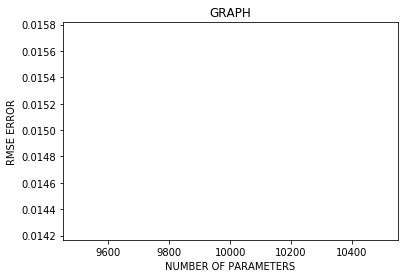

MIN ERROR RMSE== 0.014992384196858614     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [67]:
#BUILD THE GRAPH
X=np.array(parameter_catBoostRegressor)
Y=np.array(accuracy_catBoostRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [46]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
nombre=0
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        nombre+=1
        #print(train_data["galaxy"].loc[i])
print("nombre==",nombre)

nombre== 2


# <center >LIGHTGBM REGRESSOR </center> #

In [138]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.25, random_state=10)

#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
import lightgbm as lgb 
d_train=lgb.Dataset(DATA_node_train_preprocessing,label=Y_node_train_preprocessing)
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'gamma'
params['metric'] = 'l1'
params['sub_feature'] = 0.5
params['num_leaves'] = 40
params['min_data'] = 50
params['max_depth'] = 30
#---------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------



#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_lgbmRegressor=[]
parameter_lgbmRegressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_lgbmRegressor.append(i+1)
    
    #training the bagging model
    lgbm_regressor = lgb.train(params, d_train, 1000)

    #predictor and calcul rms
    prediction_=lgbm_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_lgbmRegressor.append(rmse)
timer(start_time)


Time taken: 0 hours 0 minutes and 2.71 seconds.


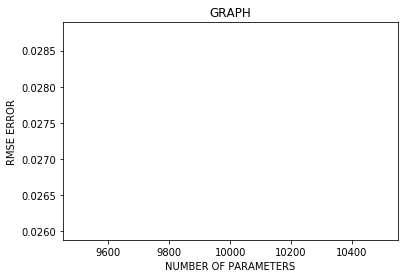

MIN ERROR RMSE== 0.02738563683077932     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [139]:
#BUILD THE GRAPH
X=np.array(parameter_lgbmRegressor)
Y=np.array(accuracy_lgbmRegressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [129]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
nombre=0
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        nombre+=1
        #print(train_data["galaxy"].loc[i])
print("nombre==",nombre)

nombre== 223


# <center >XGB REGRESSOR </center> #

In [77]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]


###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)

#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_xgb_regressor=[]
parameter_xgb_regressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_xgb_regressor.append(i+1)
    xgb_clf_regressor =XGBRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1000)
    #training the xgb model
    xgb_clf_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)
    
    #predictor and calcul rms
    prediction_=xgb_clf_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_xgb_regressor.append(rmse)
timer(start_time)

print(rmse)

/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:51:56] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Time taken: 0 hours 1 minutes and 22.93 seconds.
0.0148993636121811


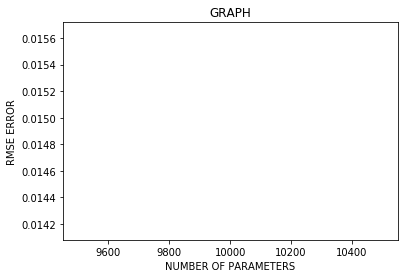

MIN ERROR RMSE== 0.0148993636121811     OBTAIN WITH learning_rate== 0.02      and n_estimators== 10001


In [78]:
#BUILD THE GRAPH
X=np.array(parameter_xgb_regressor)
Y=np.array(accuracy_xgb_regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR RMSE==",min_rmse,"    OBTAIN WITH learning_rate==",rate,"     and n_estimators==",estimator)

In [66]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)
test_data_preprocessing=Feature_Engineering_version_4(test_data)

#build the model
xgb_clf_regressor =XGBRegressor(n_estimators=i+1, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)

#fit the model
xgb_clf_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)


prediction_test=xgb_clf_regressor.predict(test_data_preprocessing)
test_data["y"]=prediction_test
#---------------------------------------------------------------------------------------------------------------
#op_pred=repartition_energy_strategy_1(test_data,10)
#op_pred=repartition_energy_strategy_2(test_data,11)
#op_pred=repartition_energy_strategy_3(test_data,11)
#op_pred=repartition_energy_strategy_4(test_data,10)
#op_pred=repartition_energy_strategy_5(test_data,10)
#op_pred=repartition_energy_strategy_6(test_data,10)
#op_pred=repartition_energy_strategy_7(test_data,10)
#op_pred=repartition_energy_strategy_8(test_data,10)
#op_pred=repartition_energy_strategy_9(test_data,10)
#op_pred=repartition_energy_strategy_10(test_data,10)
#op_pred=repartition_energy_strategy_11(test_data,10)
op_pred=repartition_energy_strategy_12(test_data,10)

prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])
    #prediction_liste.append([test_data["y"][i],test_data["allocation energy"][i]])
    #print([prediction_test[i],op_pred[i]])
    #print(prediction_liste[i])

#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("----------------------------------------------------------------------------------------------------------")
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
save_liste(prediction_liste,"prediction_")

/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/panongbene/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[09:53:03] WARNING: /opt/conda/conda-bld/xgboost_1560800456086/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.899
percentage_inf_0_7== 0.1
Total energy== 49950.0
SQR ALLOCATION ENERGY== 14517.467
----------------------------------------------------------------------------------------------------------
POTENTIAL FOR INCREASE ON THE INDEX  =  3594.191312536164
LIKELY INCREASE IN THE INDEX         =  828.862110845706
TOTAL INDEX                          =  306.64891970157623


## PREDICTION XGB

In [ ]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_1(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.3, random_state=10)

start_time = timer(None)
xgb_clf_regressor =XGBRegressor(n_estimators=100001, learning_rate= 0.09, max_depth=3,min_samples_split=3, min_samples_leaf=1)
#training the xgb model
xgb_clf_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)
    
#predictor and calcul rms
prediction_=xgb_clf_regressor.predict(DATA_node_test_preprocessing)
rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
timer(start_time)

print(rmse)

## CONCLUSION: ?????

## <center> RANDOM FOREST REGRESSOR</center> ##

In [79]:
#load datalassifier 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_2(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
#for trace the graph
accuracy_random_forest_regressor=[]
parameter_random_forest_regressor=[]

#for obtain the best caracteristique
min_rmse=1.0
rate=0.0
estimator=0

start_time = timer(None)
for i in range(10000,10001):
    parameter_random_forest_regressor.append(i+1)
    rfc_regressor = RandomForestRegressor(n_estimators=i+1, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the random forest model
    rfc_regressor.fit(DATA_node_train_preprocessing, Y_node_train_preprocessing)    
    #predictor and calcul rms
    prediction_=rfc_regressor.predict(DATA_node_test_preprocessing)
    rmse=sqrt(mean_squared_error(Y_node_test_preprocessing,prediction_))
    
    if(rmse<min_rmse):
        min_rmse=rmse
        rate=0.02
        estimator=i+1
    accuracy_random_forest_regressor.append(rmse)
timer(start_time)


Time taken: 0 hours 3 minutes and 42.69 seconds.


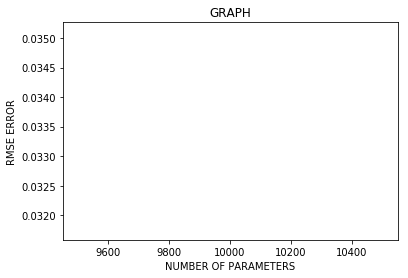

MIN ERROR== 0.033425205644506864      and n_estimators== 10001


In [80]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_regressor)
Y=np.array(accuracy_random_forest_regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('RMSE ERROR')
plt.title('GRAPH')
plt.show()
print("MIN ERROR==",min_rmse,"     and n_estimators==",estimator)

## CONCLUSION: ?????

In [ ]:
#test submission
test_data=pd.read_csv("DATA/test.csv")
test_data_preprocessing=Feature_Engineering(test_data)

prediction_test=xgb_clf_regressor.predict(test_data_preprocessing)
test_data["y"]=prediction_test
#---------------------------------------------------------------------------------------------------------------
#op_pred=repartition_energy_strategy_1(test_data,11)
#op_pred=repartition_energy_strategy_2(test_data,11)
#op_pred=repartition_energy_strategy_3(test_data,11)
#op_pred=repartition_energy_strategy_4(test_data,10)
#op_pred=repartition_energy_strategy_5(test_data,10)
op_pred=repartition_energy_strategy_6(test_data,10)
prediction_liste=[]
#---------------------------------------------------------------------------------------------------------------
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])
    #print([prediction_test[i],op_pred[i]])
    #print(prediction_liste[i])

#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
#save_liste(prediction_liste,"mamedou_random_forest_regressor_regressor")

 ## LIKELY IN HERE WE TRY TO BUILD THE GRAPHE OF LIKELY INCREASE IN FACT PARAMETOR OF MODEL USING RANDOM FOREST REGRESSOR

In [200]:
#load data 
train_data=pd.read_csv("DATA/train.csv")
test_data=pd.read_csv("DATA/test.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering(train_data)
test_data_preprocessing=Feature_Engineering(test_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)


#TRAINING THE MODEL FOR A LOT OF PARAMETER
likely_increase_random_forest_Regressor=[]
parameter_random_forest_Regressor=[]
potential_increase_random_forest_Regressor=[]
total_index_random_forest_Regressor=[]

start_time = timer(None)
for i in [1,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
    parameter_random_forest_Regressor.append(i+1)
    rfc_regressor = RandomForestRegressor(n_estimators=i+1, max_depth=3,min_samples_split=3, min_samples_leaf=1)
    #training the bagging model
    rfc_regressor.fit(train_data_preprocessing, Y_train_data_preprocessing)

    #compute the test
    prediction_test=rfc_regressor.predict(test_data_preprocessing)
    test_data["y"]=prediction_test    
    op_pred=repartition_energy_strategy_5(test_data,10)
    prediction_liste=[]
    for i in range(prediction_test.shape[0]):
        prediction_liste.append([prediction_test[i],op_pred[i]])
    
    #statistique predictor
    Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
    likely_increase_random_forest_Regressor.append(Potential_for_increase_in_the_Index)
    potential_increase_random_forest_Regressor.append(Likely_increase_in_the_Index)
    total_index_random_forest_Regressor.append(total_index)
    
timer(start_time)

In [ ]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_Regressor)
Y=np.array(likely_increase_random_forest_Regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('LIKELY INCREASE')
plt.title('GRAPH')
plt.show()

In [ ]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_Regressor)
Y=np.array(potential_increase_random_forest_Regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('POTENTIAL INCREASE')
plt.title('GRAPH')
plt.show()

In [ ]:
#BUILD THE GRAPH
X=np.array(parameter_random_forest_Regressor)
Y=np.array(total_index_random_forest_Regressor)
plt.plot(X, Y, 'r')
plt.xlabel('NUMBER OF PARAMETERS')
plt.ylabel('TOTAL INDEX')
plt.title('GRAPH')
plt.show()

## <center> ENERGY OPTIMISATIPON TEST </center>##

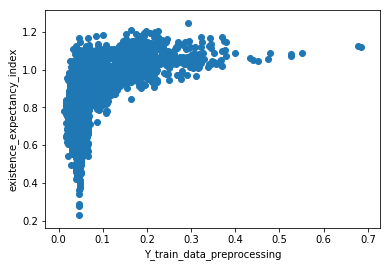

In [212]:
plt.scatter(Y_train_data_preprocessing,existence_expectancy_index)  # on utilise la fonction sinus de Numpy
plt.xlabel('Y_train_data_preprocessing')
plt.ylabel("existence_expectancy_index")
plt.show()

In [44]:
#potential augmentation
Potential_for_increase_in_the_Index=-np.log(Y_train_data_preprocessing+0.01)+3
Likely_ncrease_n_he_ndex=(Potential_for_increase_in_the_Index**2)/1000

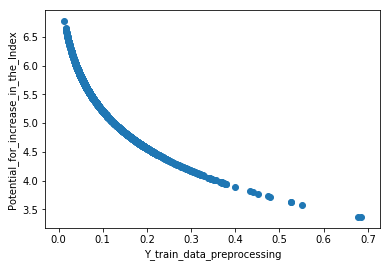

In [45]:
plt.scatter(Y_train_data_preprocessing,Potential_for_increase_in_the_Index)  # on utilise la fonction sinus de Numpy
plt.xlabel('Y_train_data_preprocessing')
plt.ylabel("Potential_for_increase_in_the_Index")
plt.show()

## Testing Gradient Boosting for Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import fbeta_score, make_scorer
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]
###############################################################################################################
#----------------------------------------------------------------------------------------------------------------
for i in Y_train_data_preprocessing.index.values:
    if(Y_train_data_preprocessing[i]>0.6):
        train_data.drop(i,0,inplace=True)
Y_train_data_preprocessing=train_data["y"]
#----------------------------------------------------------------------------------------------------------------
###############################################################################################################
###############################################################################################################
#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#preprocessing Data
train_data_preprocessing=Feature_Engineering_version_4(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)

bagging_regressor = GradientBoostingRegressor(n_estimators=10001, learning_rate= 0.09, max_depth=3,min_samples_split=1000, min_samples_leaf=1)

error=cross_val_score(bagging_regressor, train_data_preprocessing, Y_train_data_preprocessing, cv=5, scoring=make_scorer(mean_squared_error))


print(sqrt(error.mean()))


0.016534853554737383


In [76]:
for i in range(5):
    print(sqrt(error[i]))

0.006884579442499864
0.007017615051911736
0.008914375542562608
0.010465927477285992
0.032884051240571005


In [95]:
#prediction_=bagging_regressor.predict(DATA_node_test_preprocessing)

## TEST BRIOULLON

In [247]:
#load data 
train_data=pd.read_csv("DATA/train.csv")

#we extract the index in training data
Y_train_data_preprocessing=train_data["y"]

#we delete the index so that our the dataframe can be processed by our preprocessing function
del train_data["y"]

#test submission
test_data=pd.read_csv("DATA/test.csv")

train_data_preprocessing=Feature_Engineering_version_1(train_data)

#to divide data to training and testing data
DATA_node_train_preprocessing, DATA_node_test_preprocessing, Y_node_train_preprocessing, Y_node_test_preprocessing= train_test_split(train_data_preprocessing, Y_train_data_preprocessing, test_size=0.2, random_state=10)

# Create our model
model = GradientBoostingRegressor(n_estimators=100001, learning_rate= 0.29, max_depth=3,min_samples_split=3, min_samples_leaf=1)

# Fit the model
model.fit(train_data_preprocessing, Y_train_data_preprocessing)

# Score the model
print(sqrt(mean_squared_error(Y_node_test_preprocessing, model.predict(DATA_node_test_preprocessing)))) 

#/*****************************************************************************************************************/
#predictionafter training
#test_data_preprocessing=test_data.fillna(0)
#last_prediction=pd.read_csv("prediction_sawadogo2_0.07308613.csv")
#test_data_preprocessing["y"]=last_prediction["pred"]
test_data_preprocessing=Feature_Engineering_version_1(test_data)
prediction_test=model.predict(test_data_preprocessing)
test_data["yy"]=prediction_test

op_pred=repartition_energy_strategy_6(test_data,10)
#op_pred=repartition_energy_strategy_6(test_data,10)
prediction_liste=[]
for i in range(prediction_test.shape[0]):
    prediction_liste.append([prediction_test[i],op_pred[i]])

#statistique 
Potential_for_increase_in_the_Index, Likely_increase_in_the_Index, total_index=optimization_energey_statistique(prediction_liste)
print("POTENTIAL FOR INCREASE ON THE INDEX  = ",Potential_for_increase_in_the_Index)
print("LIKELY INCREASE IN THE INDEX         = ",Likely_increase_in_the_Index)
print("TOTAL INDEX                          = ",total_index)

#save the prediction
save_liste(prediction_liste,"mamedou_test123")

0.000319152407124116


/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/panongbene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


percentage_sup_0_7== 0.89988
percentage_inf_0_7== 0.1
POTENTIAL FOR INCREASE ON THE INDEX  =  5009.622923274585
LIKELY INCREASE IN THE INDEX         =  1858.4663077058772
TOTAL INDEX                          =  73.25218632931372


In [ ]:
0.007666798077438549
0.007357061463387327
0.007187262413598003